## Project 1: Exploratory Data Analysis (EDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import datetime
from datetime import datetime as dt

### 1. Import Data Sources

#### A. MTA turnstile data (Apr to Jun 2018 and 2019)

In [2]:
list1 = pd.date_range(start='4/06/2019',end='6/29/2019',periods=13)

In [4]:
list2 = [x.strftime('%y%m%d') for x in list1]

In [6]:
list3 = []
for i in list2:
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_" + i + ".txt"
    df = pd.read_csv(url)
    list3.append(df)

In [7]:
df_MTA = pd.concat(list3)

In [8]:
with open('df_MTA.pickle', 'wb') as to_write:
    pickle.dump(df_MTA, to_write)

In [9]:
del df_MTA

#### B. US Census Bureau Data (TractID, Income Data)

In [2]:
df1 = pd.read_csv('acs2017_census_tract_data.csv')

#### C. NYC Subway Station Geo Data (Latitude, Longitude)

In [3]:
nyc_df = pd.read_csv('http://web.mta.info/developers/data/nyct/subway/Stations.csv')

### 2. Exploratory Data Analysis and Visualization

#### A. MTA turnstile data (Apr to Jun 2018 and 2019)

In [4]:
with open('df_MTA.pickle', 'rb') as read_file:
    df_MTA = pickle.load(read_file)

In [5]:
df_MTA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2664248 entries, 0 to 205962
Data columns (total 11 columns):
 #   Column                                                                Dtype 
---  ------                                                                ----- 
 0   C/A                                                                   object
 1   UNIT                                                                  object
 2   SCP                                                                   object
 3   STATION                                                               object
 4   LINENAME                                                              object
 5   DIVISION                                                              object
 6   DATE                                                                  object
 7   TIME                                                                  object
 8   DESC                                                           

In [16]:
mask1 = ((df_MTA["C/A"] == "PTH22")
         & (df_MTA["UNIT"] == "R540")
         & (df_MTA["SCP"] == "00-04-04")
         & (df_MTA["STATION"] == "PATH NEW WTC"))

#### <font color='red'> *Notice how DATE skips from 5/7/2019 to 6/5/2019 below for the C/A, UNIT, SCP, STATION combo below*

In [25]:
df_MTA[mask1][215:225]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
125701,PTH22,R540,00-04-04,PATH NEW WTC,1,PTH,05/06/2019,16:28:02,REGULAR,11906,241444
125702,PTH22,R540,00-04-04,PATH NEW WTC,1,PTH,05/06/2019,20:40:02,REGULAR,11906,241483
125703,PTH22,R540,00-04-04,PATH NEW WTC,1,PTH,05/07/2019,00:52:02,REGULAR,11906,241487
125704,PTH22,R540,00-04-04,PATH NEW WTC,1,PTH,05/07/2019,05:04:02,REGULAR,11906,241488
125705,PTH22,R540,00-04-04,PATH NEW WTC,1,PTH,05/07/2019,09:16:02,REGULAR,11906,241635
126878,PTH22,R540,00-04-04,PATH NEW WTC,1,PTH,06/05/2019,12:20:37,REGULAR,4,75
126879,PTH22,R540,00-04-04,PATH NEW WTC,1,PTH,06/05/2019,16:32:37,REGULAR,4,84
126880,PTH22,R540,00-04-04,PATH NEW WTC,1,PTH,06/05/2019,20:44:37,REGULAR,6,118
126881,PTH22,R540,00-04-04,PATH NEW WTC,1,PTH,06/06/2019,00:56:37,REGULAR,10,120
126882,PTH22,R540,00-04-04,PATH NEW WTC,1,PTH,06/06/2019,05:08:37,REGULAR,10,122


In [26]:
df_MTA.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/30/2019,00:00:00,REGULAR,6999064,2373568
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/30/2019,04:00:00,REGULAR,6999084,2373576
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/30/2019,08:00:00,REGULAR,6999107,2373622
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/30/2019,12:00:00,REGULAR,6999214,2373710
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/30/2019,16:00:00,REGULAR,6999451,2373781


In [6]:
df_MTA.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [7]:
df_MTA.columns = [column.strip() for column in df_MTA.columns]

In [8]:
df_MTA.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [9]:
df_MTA.DATE.value_counts().sort_index()

03/30/2019    28919
03/31/2019    28944
04/01/2019    29152
04/02/2019    28975
04/03/2019    29104
              ...  
06/24/2019    29479
06/25/2019    29437
06/26/2019    29417
06/27/2019    29464
06/28/2019    29779
Name: DATE, Length: 91, dtype: int64

In [10]:
df_MTA.DATE.value_counts().sort_index().head(10)

03/30/2019    28919
03/31/2019    28944
04/01/2019    29152
04/02/2019    28975
04/03/2019    29104
04/04/2019    29168
04/05/2019    28702
04/06/2019    28863
04/07/2019    28892
04/08/2019    29018
Name: DATE, dtype: int64

In [11]:
df_MTA.DATE.value_counts().sort_index().tail(10)

06/19/2019    29614
06/20/2019    29556
06/21/2019    30360
06/22/2019    29217
06/23/2019    29170
06/24/2019    29479
06/25/2019    29437
06/26/2019    29417
06/27/2019    29464
06/28/2019    29779
Name: DATE, dtype: int64

In [12]:
df_MTA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2664248 entries, 0 to 205962
Data columns (total 11 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   C/A       object
 1   UNIT      object
 2   SCP       object
 3   STATION   object
 4   LINENAME  object
 5   DIVISION  object
 6   DATE      object
 7   TIME      object
 8   DESC      object
 9   ENTRIES   int64 
 10  EXITS     int64 
dtypes: int64(2), object(9)
memory usage: 243.9+ MB


In [13]:
df_MTA["DATE_TIME"] = pd.to_datetime(df_MTA.DATE + " " + df_MTA.TIME, format="%m/%d/%Y %H:%M:%S")

In [14]:
df_MTA.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/30/2019,00:00:00,REGULAR,6999064,2373568,2019-03-30 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/30/2019,04:00:00,REGULAR,6999084,2373576,2019-03-30 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/30/2019,08:00:00,REGULAR,6999107,2373622,2019-03-30 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/30/2019,12:00:00,REGULAR,6999214,2373710,2019-03-30 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/30/2019,16:00:00,REGULAR,6999451,2373781,2019-03-30 16:00:00


In [15]:
# check for duplicates, for each combination of "C/A", "UNIT", "SCP", "STATION", "DATE_TIME"
(df_MTA
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(10)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
626289,N045,R187,01-00-00,81 ST-MUSEUM,2019-06-01 17:00:00,2
2178082,R283,R221,00-00-00,167 ST,2019-04-16 04:00:00,2
384181,G009,R151,02-00-04,CONEY IS-STILLW,2019-05-16 17:00:00,2
1749648,R133,R272,00-00-00,28 ST,2019-04-09 13:00:00,2
626294,N045,R187,01-00-00,81 ST-MUSEUM,2019-06-02 17:00:00,2
627445,N045,R187,01-00-02,81 ST-MUSEUM,2019-06-17 09:00:00,2
527149,JFK03,R536,00-00-04,JFK JAMAICA CT1,2019-04-07 01:00:00,2
627947,N045,R187,01-06-00,81 ST-MUSEUM,2019-06-11 21:00:00,2
701781,N071,R013,00-00-03,34 ST-PENN STA,2019-04-20 08:00:00,2
525303,JFK03,R536,00-00-01,JFK JAMAICA CT1,2019-04-07 01:00:00,2


In [16]:
mask = ((df_MTA["C/A"] == "N071") & 
(df_MTA["UNIT"] == "R013") & 
(df_MTA["SCP"] == "00-00-02") & 
(df_MTA["STATION"] == "34 ST-PENN STA") &
(df_MTA["DATE_TIME"].dt.date == datetime.datetime(2019, 4, 20).date()))

In [17]:
df_MTA[mask]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
53584,N071,R013,00-00-02,34 ST-PENN STA,ACE,IND,04/20/2019,00:00:00,RECOVR AUD,3071535,4512012,2019-04-20 00:00:00
53585,N071,R013,00-00-02,34 ST-PENN STA,ACE,IND,04/20/2019,04:00:00,REGULAR,8481280,10918514,2019-04-20 04:00:00
53586,N071,R013,00-00-02,34 ST-PENN STA,ACE,IND,04/20/2019,08:00:00,REGULAR,8481300,10918541,2019-04-20 08:00:00
53587,N071,R013,00-00-02,34 ST-PENN STA,ACE,IND,04/20/2019,08:00:00,RECOVR AUD,3071562,4512111,2019-04-20 08:00:00
53588,N071,R013,00-00-02,34 ST-PENN STA,ACE,IND,04/20/2019,12:00:00,REGULAR,3071678,4512313,2019-04-20 12:00:00
53589,N071,R013,00-00-02,34 ST-PENN STA,ACE,IND,04/20/2019,16:00:00,REGULAR,3071862,4512589,2019-04-20 16:00:00
53590,N071,R013,00-00-02,34 ST-PENN STA,ACE,IND,04/20/2019,20:00:00,REGULAR,3072147,4512819,2019-04-20 20:00:00


In [18]:
df_MTA.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True, ascending=True)

In [19]:
df_MTA.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [20]:
df_MTA.DESC.value_counts()

REGULAR       2652913
RECOVR AUD      11279
Name: DESC, dtype: int64

In [21]:
# confirm that there are no duplicates, that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" combo are unique
(df_MTA
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2019-03-30 00:00:00,1
1776141,R141,R031,00-06-00,34 ST-PENN STA,2019-03-31 12:00:00,1
1776123,R141,R031,00-03-04,34 ST-PENN STA,2019-06-27 12:00:00,1
1776124,R141,R031,00-03-04,34 ST-PENN STA,2019-06-27 16:00:00,1
1776125,R141,R031,00-03-04,34 ST-PENN STA,2019-06-27 20:00:00,1


In [22]:
df_MTA['YEAR'] = df_MTA["DATE_TIME"].dt.year

In [23]:
df_MTA.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,YEAR
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/30/2019,00:00:00,REGULAR,6999064,2373568,2019-03-30 00:00:00,2019
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/30/2019,04:00:00,REGULAR,6999084,2373576,2019-03-30 04:00:00,2019
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/30/2019,08:00:00,REGULAR,6999107,2373622,2019-03-30 08:00:00,2019
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/30/2019,12:00:00,REGULAR,6999214,2373710,2019-03-30 12:00:00,2019
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/30/2019,16:00:00,REGULAR,6999451,2373781,2019-03-30 16:00:00,2019


In [24]:
df_MTA_2019 = df_MTA[df_MTA.YEAR == 2019]

In [37]:
df_MTA_2019['LINENAME'] = df_MTA_2019['LINENAME'].apply(lambda x: ''.join(sorted(x)))

In [38]:
df_MTA_2019['station_linename'] = df_MTA_2019['STATION'] + "_" + df_MTA_2019["LINENAME"]

In [42]:
list_of_station_linenames = sorted(df_MTA_2019['station_linename'].unique())

In [43]:
list_of_station_linenames

['1 AV_L',
 '103 ST-CORONA_7',
 '103 ST_1',
 '103 ST_6',
 '103 ST_BC',
 '104 ST_A',
 '104 ST_JZ',
 '110 ST_6',
 '111 ST_7',
 '111 ST_A',
 '111 ST_J',
 '116 ST-COLUMBIA_1',
 '116 ST_23',
 '116 ST_6',
 '116 ST_BC',
 '121 ST_JZ',
 '125 ST_1',
 '125 ST_23',
 '125 ST_456',
 '125 ST_ABCD',
 '135 ST_23',
 '135 ST_BC',
 '137 ST CITY COL_1',
 '138/GRAND CONC_45',
 '14 ST-UNION SQ_456LNQRW',
 '14 ST_123FLM',
 '14 ST_ACEL',
 '145 ST_1',
 '145 ST_3',
 '145 ST_ABCD',
 '149/GRAND CONC_245',
 '14TH STREET_1',
 '15 ST-PROSPECT_FG',
 '155 ST_BD',
 '155 ST_C',
 '157 ST_1',
 '161/YANKEE STAD_4BD',
 '163 ST-AMSTERDM_C',
 '167 ST_4',
 '167 ST_BD',
 '168 ST_1AC',
 '169 ST_F',
 '170 ST_4',
 '170 ST_BD',
 '174 ST_25',
 '174-175 STS_BD',
 '175 ST_A',
 '176 ST_4',
 '18 AV_D',
 '18 AV_F',
 '18 AV_N',
 '18 ST_1',
 '181 ST_1',
 '181 ST_A',
 '182-183 STS_BD',
 '183 ST_4',
 '190 ST_A',
 '191 ST_1',
 '2 AV_F',
 '20 AV_D',
 '20 AV_N',
 '207 ST_1',
 '21 ST-QNSBRIDGE_F',
 '21 ST_G',
 '215 ST_1',
 '219 ST_25',
 '225 ST_2

In [45]:
x = list(df_MTA_2019['STATION'].unique())

In [49]:
# confirm that there are no "_" in "STATION" column (so you can split using "_" below)
set(np.char.find(x, '_'))

{-1}

In [44]:
# create a dictionary called station_linenames_dict where keys are station names, values are unique line names 
# that run out of that station
# assumption is that if a "STATION" has unique linenames, it is a unique STATION (physical/geo/map)
# PURPOSE is to separate "STATION" into individual separate subway stations in real life NYC (e.g. 23rd St, 86th St, 125th St)
station_linenames_dict = {}

for station_linename in list_of_station_linenames:
    # split into station and linename
    station, linename = station_linename.split('_')
    
    if station in station_linenames_dict:
        
        unique_linename = True
        for current_values in station_linenames_dict[station]:
        # if linename shares any linenames with other station/linenames, set linename to the union of all shared linenames   
            if set(linename).intersection(set(current_values)):
                station_linenames_dict[station] = [''.join(sorted(set(linename).union(set(current_values))))]
                unique_linename = False
        
        # if unique linename, then assume it is a separate subway station in real life NYC 
        if unique_linename == True:
            station_linenames_dict[station].append(linename)
    
    else:
        station_linenames_dict[station] = [linename]

In [50]:
def proper_station_linename_column(row):  
    """
    Function below to account for multiple subway stations in real life NYC showing up as the same string in 
    'STATION' column (e.g. 23rd St, 86th St, 125th St)
    """
    if len(station_linenames_dict[row['STATION']]) > 1:
        row['STATION'] = row['station_linename']
    return row['STATION']

In [51]:
df_MTA_2019['STATION'] = df_MTA_2019.apply(proper_station_linename_column, axis=1)

In [53]:
sorted(df_MTA_2019["STATION"].unique())

['1 AV',
 '103 ST-CORONA',
 '103 ST_1',
 '103 ST_6',
 '103 ST_BC',
 '104 ST_A',
 '104 ST_JZ',
 '110 ST',
 '111 ST_7',
 '111 ST_A',
 '111 ST_J',
 '116 ST-COLUMBIA',
 '116 ST_23',
 '116 ST_6',
 '116 ST_BC',
 '121 ST',
 '125 ST_1',
 '125 ST_23',
 '125 ST_456',
 '125 ST_ABCD',
 '135 ST_23',
 '135 ST_BC',
 '137 ST CITY COL',
 '138/GRAND CONC',
 '14 ST',
 '14 ST-UNION SQ',
 '145 ST_1',
 '145 ST_3',
 '145 ST_ABCD',
 '149/GRAND CONC',
 '14TH STREET',
 '15 ST-PROSPECT',
 '155 ST_BD',
 '155 ST_C',
 '157 ST',
 '161/YANKEE STAD',
 '163 ST-AMSTERDM',
 '167 ST_4',
 '167 ST_BD',
 '168 ST',
 '169 ST',
 '170 ST_4',
 '170 ST_BD',
 '174 ST',
 '174-175 STS',
 '175 ST',
 '176 ST',
 '18 AV_D',
 '18 AV_F',
 '18 AV_N',
 '18 ST',
 '181 ST_1',
 '181 ST_A',
 '182-183 STS',
 '183 ST',
 '190 ST',
 '191 ST',
 '2 AV',
 '20 AV_D',
 '20 AV_N',
 '207 ST',
 '21 ST',
 '21 ST-QNSBRIDGE',
 '215 ST',
 '219 ST',
 '225 ST',
 '23 ST_1',
 '23 ST_6',
 '23 ST_CE',
 '23 ST_FM',
 '23 ST_NRW',
 '231 ST',
 '233 ST',
 '238 ST',
 '25 A

In [54]:
# take the first row for each combination of "C/A", "UNIT", "SCP", "STATION", "DATE" to look at daily entries/exits
df_MTA_2019_daily = (df_MTA_2019
                     .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)[["ENTRIES","EXITS"]]
                     .first())

In [55]:
df_MTA_2019_daily.head(10)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,03/30/2019,6999064,2373568
1,A002,R051,02-00-00,59 ST,03/31/2019,6999957,2373867
2,A002,R051,02-00-00,59 ST,04/01/2019,7000528,2374095
3,A002,R051,02-00-00,59 ST,04/02/2019,7002087,2374579
4,A002,R051,02-00-00,59 ST,04/03/2019,7003680,2375133
5,A002,R051,02-00-00,59 ST,04/04/2019,7005332,2375557
6,A002,R051,02-00-00,59 ST,04/05/2019,7006970,2376068
7,A002,R051,02-00-00,59 ST,04/06/2019,7008540,2376546
8,A002,R051,02-00-00,59 ST,04/07/2019,7009464,2376791
9,A002,R051,02-00-00,59 ST,04/08/2019,7010160,2377000


In [56]:
df_MTA_2019_daily["PREV_DATE"] = (df_MTA_2019_daily
                                  .groupby(["C/A", "UNIT", "SCP", "STATION"])
                                  .DATE
                                  .apply(lambda group: group.shift(1)))

In [57]:
df_MTA_2019_daily["PREV_ENTRIES"] = (df_MTA_2019_daily
                                     .groupby(["C/A", "UNIT", "SCP", "STATION"])
                                     .ENTRIES
                                     .apply(lambda group: group.shift(1)))

In [58]:
df_MTA_2019_daily["PREV_EXITS"] = (df_MTA_2019_daily
                                   .groupby(["C/A", "UNIT", "SCP", "STATION"])
                                   .EXITS
                                   .apply(lambda group: group.shift(1)))

In [59]:
df_MTA_2019_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS
0,A002,R051,02-00-00,59 ST,03/30/2019,6999064,2373568,NaN,NaN,NaN
1,A002,R051,02-00-00,59 ST,03/31/2019,6999957,2373867,03/30/2019,6999064.0,2373568.0
2,A002,R051,02-00-00,59 ST,04/01/2019,7000528,2374095,03/31/2019,6999957.0,2373867.0
3,A002,R051,02-00-00,59 ST,04/02/2019,7002087,2374579,04/01/2019,7000528.0,2374095.0
4,A002,R051,02-00-00,59 ST,04/03/2019,7003680,2375133,04/02/2019,7002087.0,2374579.0


In [60]:
df_MTA_2019_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [61]:
# check if entries is less than previous day's entries
# perhaps turnstiles are working in reverse order/count
df_MTA_2019_daily[df_MTA_2019_daily["ENTRIES"] < df_MTA_2019_daily["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS
7044,A025,R023,01-03-01,34 ST-HERALD SQ,03/31/2019,1238567092,1813218523,03/30/2019,1.238570e+09,1.813217e+09
7045,A025,R023,01-03-01,34 ST-HERALD SQ,04/01/2019,1238565030,1813219495,03/31/2019,1.238567e+09,1.813219e+09
7046,A025,R023,01-03-01,34 ST-HERALD SQ,04/02/2019,1238561212,1813221361,04/01/2019,1.238565e+09,1.813219e+09
7047,A025,R023,01-03-01,34 ST-HERALD SQ,04/03/2019,1238557159,1813223205,04/02/2019,1.238561e+09,1.813221e+09
7048,A025,R023,01-03-01,34 ST-HERALD SQ,04/04/2019,1238553023,1813225047,04/03/2019,1.238557e+09,1.813223e+09


In [62]:
(df_MTA_2019_daily[df_MTA_2019_daily["ENTRIES"] < df_MTA_2019_daily["PREV_ENTRIES"]]
 .groupby(["C/A", "UNIT", "SCP", "STATION"])
 .size())

C/A   UNIT  SCP       STATION        
A025  R023  01-03-01  34 ST-HERALD SQ    90
A037  R170  05-00-00  14 ST-UNION SQ      1
A038  R085  00-00-01  8 ST-NYU            1
            00-06-00  8 ST-NYU            1
A039  R085  01-00-01  8 ST-NYU            1
                                         ..
R623  R061  00-00-00  NOSTRAND AV_3       1
            00-00-01  NOSTRAND AV_3       1
R629  R065  00-00-00  ROCKAWAY AV_3       1
R646  R110  01-00-01  FLATBUSH AV-B.C    90
R730  R431  00-00-04  EASTCHSTER/DYRE    86
Length: 547, dtype: int64

In [63]:
df_reverse = df_MTA_2019_daily[df_MTA_2019_daily["ENTRIES"] < df_MTA_2019_daily["PREV_ENTRIES"]]

In [64]:
df_MTA_2019_daily["DAILY_ENTRIES"] = df_MTA_2019_daily["ENTRIES"] - df_MTA_2019_daily["PREV_ENTRIES"]

In [65]:
df_MTA_2019_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,03/31/2019,6999957,2373867,03/30/2019,6999064.0,2373568.0,893.0
2,A002,R051,02-00-00,59 ST,04/01/2019,7000528,2374095,03/31/2019,6999957.0,2373867.0,571.0
3,A002,R051,02-00-00,59 ST,04/02/2019,7002087,2374579,04/01/2019,7000528.0,2374095.0,1559.0
4,A002,R051,02-00-00,59 ST,04/03/2019,7003680,2375133,04/02/2019,7002087.0,2374579.0,1593.0
5,A002,R051,02-00-00,59 ST,04/04/2019,7005332,2375557,04/03/2019,7003680.0,2375133.0,1652.0


In [66]:
sorted(list(df_MTA_2019_daily["DAILY_ENTRIES"]))[:10]

[-2071638447.0,
 -1835263287.0,
 -1661415786.0,
 -1437240927.0,
 -1169826167.0,
 -1061119685.0,
 -839251708.0,
 -637594773.0,
 -621484707.0,
 -367651227.0]

In [67]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        return 0
    return counter

In [68]:
df_MTA_2019_daily.drop(columns=["DAILY_ENTRIES"],inplace=True)

In [69]:
df_MTA_2019_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS
1,A002,R051,02-00-00,59 ST,03/31/2019,6999957,2373867,03/30/2019,6999064.0,2373568.0
2,A002,R051,02-00-00,59 ST,04/01/2019,7000528,2374095,03/31/2019,6999957.0,2373867.0
3,A002,R051,02-00-00,59 ST,04/02/2019,7002087,2374579,04/01/2019,7000528.0,2374095.0
4,A002,R051,02-00-00,59 ST,04/03/2019,7003680,2375133,04/02/2019,7002087.0,2374579.0
5,A002,R051,02-00-00,59 ST,04/04/2019,7005332,2375557,04/03/2019,7003680.0,2375133.0


In [70]:
# 60 seconds per minute, 60 min per hour, 24 hours per day; assumption 1 person per second (starting point)
60*60*24

86400

In [71]:
df_MTA_2019_daily["DAILY_ENTRIES"] = df_MTA_2019_daily.apply(get_daily_counts, axis=1, max_counter = 86400)

In [72]:
df_MTA_2019_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,03/31/2019,6999957,2373867,03/30/2019,6999064.0,2373568.0,893.0
2,A002,R051,02-00-00,59 ST,04/01/2019,7000528,2374095,03/31/2019,6999957.0,2373867.0,571.0
3,A002,R051,02-00-00,59 ST,04/02/2019,7002087,2374579,04/01/2019,7000528.0,2374095.0,1559.0
4,A002,R051,02-00-00,59 ST,04/03/2019,7003680,2375133,04/02/2019,7002087.0,2374579.0,1593.0
5,A002,R051,02-00-00,59 ST,04/04/2019,7005332,2375557,04/03/2019,7003680.0,2375133.0,1652.0


In [73]:
df_MTA_2019_daily.sort_values(by='DAILY_ENTRIES', ascending=False).head(20)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES
256140,PTH07,R550,00-01-06,CITY / BUS,06/12/2019,111,242,06/11/2019,85343.0,79992.0,85232.0
273139,PTH22,R540,00-04-06,PATH NEW WTC,06/05/2019,8,48,05/31/2019,84511.0,268115.0,84503.0
249492,PTH03,R552,00-01-08,JOURNAL SQUARE,06/08/2019,66,47,06/07/2019,84386.0,74161.0,84320.0
247788,PTH03,R552,00-00-00,JOURNAL SQUARE,06/08/2019,159,228,06/07/2019,84321.0,34517.0,84162.0
248759,PTH03,R552,00-01-00,JOURNAL SQUARE,05/24/2019,788,5450,05/23/2019,84213.0,152211.0,83425.0
87519,JFK03,R536,00-03-04,JFK JAMAICA CT1,05/01/2019,1,125,04/30/2019,83297.0,471268.0,83296.0
262762,PTH16,R550,01-02-02,LACKAWANNA,06/12/2019,7,770,06/11/2019,83248.0,357312.0,83241.0
245426,PTH01,R549,00-01-03,NEWARK HW BMEBE,05/30/2019,0,0,05/20/2019,83070.0,938506.0,83070.0
265487,PTH18,R549,01-01-01,NEWARK BM BW,06/06/2019,179,8,06/05/2019,82876.0,1819.0,82697.0
269915,PTH22,R540,00-00-01,PATH NEW WTC,05/16/2019,169,146,05/14/2019,82578.0,184412.0,82409.0


In [74]:
# create a mask for one of the rows above where the daily entries is very very large
mask3 = ((df_MTA_2019_daily["C/A"] == "PTH22") 
         & (df_MTA_2019_daily["UNIT"] == "R540") 
         & (df_MTA_2019_daily["SCP"] == "00-04-06")
         & (df_MTA_2019_daily["STATION"] == "PATH NEW WTC"))

In [75]:
df_MTA_2019_daily[mask3][-30:-20]

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES
273133,PTH22,R540,00-04-06,PATH NEW WTC,05/26/2019,83909,267068,05/25/2019,83899.0,266971.0,10.0
273134,PTH22,R540,00-04-06,PATH NEW WTC,05/27/2019,83930,267146,05/26/2019,83909.0,267068.0,21.0
273135,PTH22,R540,00-04-06,PATH NEW WTC,05/28/2019,83940,267210,05/27/2019,83930.0,267146.0,10.0
273136,PTH22,R540,00-04-06,PATH NEW WTC,05/29/2019,84130,267517,05/28/2019,83940.0,267210.0,190.0
273137,PTH22,R540,00-04-06,PATH NEW WTC,05/30/2019,84351,267822,05/29/2019,84130.0,267517.0,221.0
273138,PTH22,R540,00-04-06,PATH NEW WTC,05/31/2019,84511,268115,05/30/2019,84351.0,267822.0,160.0
273139,PTH22,R540,00-04-06,PATH NEW WTC,06/05/2019,8,48,05/31/2019,84511.0,268115.0,84503.0
273140,PTH22,R540,00-04-06,PATH NEW WTC,06/06/2019,164,121,06/05/2019,8.0,48.0,156.0
273141,PTH22,R540,00-04-06,PATH NEW WTC,06/07/2019,386,483,06/06/2019,164.0,121.0,222.0
273142,PTH22,R540,00-04-06,PATH NEW WTC,06/08/2019,500,774,06/07/2019,386.0,483.0,114.0


In [76]:
df_MTA_2019_daily[mask3]["DAILY_ENTRIES"].max()

84503.0

In [77]:
df_MTA_2019_daily[mask3]["DAILY_ENTRIES"].median()

148.0

In [78]:
df_MTA_2019_daily[mask3]["DAILY_ENTRIES"].max() / df_MTA_2019_daily[mask3]["DAILY_ENTRIES"].median()

570.9662162162163

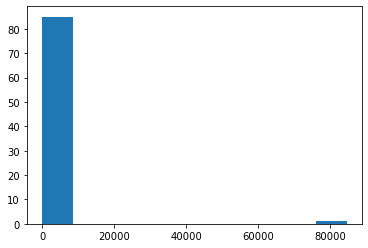

In [79]:
# plot dailiy entries based on the conditions in mask3, clearly there is an outlier!
plt.hist(df_MTA_2019_daily[mask3].DAILY_ENTRIES)
plt.savefig('hist_PTH22_R540_000406_PATHNEWWTC.outlier.png');

In [80]:
df_MTA_2019_daily["DATE_DIFF"] = pd.to_datetime(df_MTA_2019_daily.DATE) - pd.to_datetime(df_MTA_2019_daily.PREV_DATE)

In [81]:
# look at all the rows where date_diff is greater than 1 day
df_MTA_2019_daily.sort_values(by="DATE_DIFF",ascending=False).head(10)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DATE_DIFF
246335,PTH02,R544,00-00-08,HARRISON,05/24/2019,142284,6516,04/13/2019,655363.0,82906.0,0.0,41 days
272966,PTH22,R540,00-04-04,PATH NEW WTC,06/05/2019,4,75,05/07/2019,11906.0,241487.0,11902.0,29 days
268439,PTH20,R549,03-00-08,NEWARK HM HE,05/20/2019,36975,1148746,04/25/2019,409.0,2356.0,36566.0,25 days
199341,N414A,R316,01-00-01,FLUSHING AV_G,05/02/2019,547675,230120,04/08/2019,547673.0,230118.0,2.0,24 days
199409,N414A,R316,01-00-02,FLUSHING AV_G,05/02/2019,1469103,668846,04/08/2019,1469100.0,668841.0,3.0,24 days
199477,N414A,R316,01-06-00,FLUSHING AV_G,05/02/2019,1721039,1610756,04/08/2019,1721035.0,1610752.0,4.0,24 days
199545,N414A,R316,01-06-01,FLUSHING AV_G,05/02/2019,2275461,2828879,04/08/2019,2275458.0,2828875.0,3.0,24 days
199273,N414A,R316,01-00-00,FLUSHING AV_G,05/02/2019,665527,741121,04/08/2019,665524.0,741116.0,3.0,24 days
78171,J002,R460,00-06-00,MARCY AV,05/08/2019,196696,218,04/17/2019,1969149.0,4031712.0,0.0,21 days
292397,R137,R031,02-03-01,34 ST-PENN STA,06/28/2019,76679,71988,06/11/2019,76679.0,56951.0,0.0,17 days


In [82]:
time_range = pd.timedelta_range(start='1 day',periods=1)

In [83]:
time_range

TimedeltaIndex(['1 days'], dtype='timedelta64[ns]', freq='D')

In [84]:
time_range[0]

Timedelta('1 days 00:00:00')

In [85]:
# create a new dataframe to filter those specific rows where the difference between DATE and PREV_DATE > 1 day
df_MTA_2019_multipledays = df_MTA_2019_daily[df_MTA_2019_daily.DATE_DIFF > time_range[0]]

In [86]:
len(df_MTA_2019_multipledays)

580

In [87]:
len(df_MTA_2019_daily)

435725

In [88]:
len(df_MTA_2019_daily) - len(df_MTA_2019_multipledays)

435145

In [89]:
# relatively small number of rows where DATE_DIFF > 1 day, so drop them/filter them out
df_MTA_2019_daily = df_MTA_2019_daily.loc[df_MTA_2019_daily.DATE_DIFF == time_range[0]]

In [90]:
# matches above (previous dataframe minus number of rows dropped)
len(df_MTA_2019_daily)

435145

In [91]:
# check that now there are no rows where DATE_DIFF > 1 day
df_MTA_2019_daily[df_MTA_2019_daily.DATE_DIFF > time_range[0]]

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DATE_DIFF


In [92]:
# for a unique turnstile at a subway station, find the max daily_entries
df_MTA_2019_dailymax = df_MTA_2019_daily.groupby(["C/A","UNIT","SCP","STATION"]).DAILY_ENTRIES.max()

In [93]:
# for a unique turnstile at a subway station, find the min daily_entries
df_MTA_2019_dailymed = df_MTA_2019_daily.groupby(["C/A","UNIT","SCP","STATION"]).DAILY_ENTRIES.median()

In [94]:
df_MTA_2019_dailymax = pd.DataFrame(df_MTA_2019_dailymax)

In [95]:
df_MTA_2019_dailymed = pd.DataFrame(df_MTA_2019_dailymed)

In [96]:
df_MTA_2019_dailymax.reset_index(inplace=True)

In [97]:
df_MTA_2019_dailymax.rename(columns={"DAILY_ENTRIES":"MAX_DAILY_ENTRIES_TURNSTILE"},inplace=True)

In [98]:
df_MTA_2019_dailymed.reset_index(inplace=True)

In [99]:
df_MTA_2019_dailymed

,C/A,UNIT,SCP,STATION,DAILY_ENTRIES
0,A002,R051,02-00-00,59 ST,1502.0
1,A002,R051,02-00-01,59 ST,1225.5
2,A002,R051,02-03-00,59 ST,488.5
3,A002,R051,02-03-01,59 ST,1279.0
4,A002,R051,02-03-02,59 ST,1305.5
...,...,...,...,...,...
4898,TRAM2,R469,00-00-01,RIT-ROOSEVELT,1413.5
4899,TRAM2,R469,00-03-00,RIT-ROOSEVELT,305.5
4900,TRAM2,R469,00-03-01,RIT-ROOSEVELT,308.0
4901,TRAM2,R469,00-05-00,RIT-ROOSEVELT,0.0


In [100]:
df_MTA_2019_dailymax["MEDIAN_DAILY_ENTRIES_TURNSTILE"] = np.nan

In [101]:
df_MTA_2019_dailymax

,C/A,UNIT,SCP,STATION,MAX_DAILY_ENTRIES_TURNSTILE,MEDIAN_DAILY_ENTRIES_TURNSTILE
0,A002,R051,02-00-00,59 ST,1703.0,NaN
1,A002,R051,02-00-01,59 ST,1329.0,NaN
2,A002,R051,02-03-00,59 ST,573.0,NaN
3,A002,R051,02-03-01,59 ST,1397.0,NaN
4,A002,R051,02-03-02,59 ST,1560.0,NaN
...,...,...,...,...,...,...
4898,TRAM2,R469,00-00-01,RIT-ROOSEVELT,3217.0,NaN
4899,TRAM2,R469,00-03-00,RIT-ROOSEVELT,1555.0,NaN
4900,TRAM2,R469,00-03-01,RIT-ROOSEVELT,1604.0,NaN
4901,TRAM2,R469,00-05-00,RIT-ROOSEVELT,3.0,NaN


In [102]:
# since df_MTA_2019_dailymax and df_MTA_2019_dailymed are groupby objects/dfs from the df, columns can be appended
for i in range(len(df_MTA_2019_dailymax)):
    df_MTA_2019_dailymax.iloc[i,5] = df_MTA_2019_dailymed.iloc[i,4]

In [103]:
df_MTA_2019_dailymax['peak_factor'] = df_MTA_2019_dailymax["MAX_DAILY_ENTRIES_TURNSTILE"] / df_MTA_2019_dailymax["MEDIAN_DAILY_ENTRIES_TURNSTILE"]

In [104]:
df_MTA_2019_dailymax.sort_values(by='peak_factor',ascending=False)

,C/A,UNIT,SCP,STATION,MAX_DAILY_ENTRIES_TURNSTILE,MEDIAN_DAILY_ENTRIES_TURNSTILE,peak_factor
4901,TRAM2,R469,00-05-00,RIT-ROOSEVELT,3.0,0.0,inf
3717,R226A,R131,03-05-00,23 ST_6,8.0,0.0,inf
654,E001,R368,00-05-00,9 AV,4.0,0.0,inf
1089,N022,R332,02-05-00,135 ST_BC,2.0,0.0,inf
2835,PTH05,R543,00-04-09,EXCHANGE PLACE,3.0,0.0,inf
...,...,...,...,...,...,...,...
4799,R637,R451,00-06-00,WINTHROP ST,0.0,0.0,NaN
4805,R639,R109,00-05-01,CHURCH AV_25,0.0,0.0,NaN
4807,R639,R109,00-05-03,CHURCH AV_25,0.0,0.0,NaN
4829,R645,R110,00-05-01,FLATBUSH AV-B.C,0.0,0.0,NaN


In [105]:
df_MTA_2019_dailystats = df_MTA_2019_dailymax

In [106]:
df_MTA_2019_dailystats.replace(to_replace=np.inf,value=np.nan,inplace=True)

In [107]:
df_MTA_2019_dailystats.sort_values(by='peak_factor',ascending=False).head(10)

,C/A,UNIT,SCP,STATION,MAX_DAILY_ENTRIES_TURNSTILE,MEDIAN_DAILY_ENTRIES_TURNSTILE,peak_factor
3050,PTH22,R540,00-04-02,PATH NEW WTC,22190.0,1.0,22190.000000
3051,PTH22,R540,00-04-03,PATH NEW WTC,27148.0,5.0,5429.600000
1114,N026,R102,00-05-00,125 ST_ABCD,13389.0,3.0,4463.000000
4535,R532,R328,00-05-03,METS-WILLETS PT,1691.0,0.5,3382.000000
4534,R532,R328,00-05-02,METS-WILLETS PT,2337.0,1.0,2337.000000
1194,N051,R084,02-05-00,59 ST COLUMBUS,5921.0,3.0,1973.666667
2866,PTH07,R550,00-02-01,CITY / BUS,13830.0,8.0,1728.750000
4532,R532,R328,00-05-00,METS-WILLETS PT,3967.0,2.5,1586.800000
2869,PTH07,R550,00-02-04,CITY / BUS,77120.0,53.0,1455.094340
2787,PTH03,R552,00-01-08,JOURNAL SQUARE,84320.0,74.0,1139.459459


In [108]:
df_MTA_2019_daily["unique_turnstile"] = (df_MTA_2019_daily["C/A"] + "_" +
                                         df_MTA_2019_daily["UNIT"] + "_" +
                                         df_MTA_2019_daily["SCP"] + "_" +
                                         df_MTA_2019_daily["STATION"])

In [109]:
df_MTA_2019_dailystats["unique_turnstile"] = (df_MTA_2019_dailystats["C/A"] + "_" +
                                              df_MTA_2019_dailystats["UNIT"] + "_" +
                                              df_MTA_2019_dailystats["SCP"] + "_" +
                                              df_MTA_2019_dailystats["STATION"])

In [110]:
df_MTA_2019_dailystats_sum = df_MTA_2019_dailystats[["unique_turnstile","MAX_DAILY_ENTRIES_TURNSTILE","MEDIAN_DAILY_ENTRIES_TURNSTILE","peak_factor"]]

In [111]:
df_MTA_2019_daily.shape

(435145, 13)

In [112]:
df_MTA_2019_daily = df_MTA_2019_daily.merge(df_MTA_2019_dailystats_sum,how='left',on='unique_turnstile')

In [113]:
df_MTA_2019_daily.shape

(435145, 16)

In [114]:
df_MTA_2019_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DATE_DIFF,unique_turnstile,MAX_DAILY_ENTRIES_TURNSTILE,MEDIAN_DAILY_ENTRIES_TURNSTILE,peak_factor
0,A002,R051,02-00-00,59 ST,03/31/2019,6999957,2373867,03/30/2019,6999064.0,2373568.0,893.0,1 days,A002_R051_02-00-00_59 ST,1703.0,1502.0,1.133822
1,A002,R051,02-00-00,59 ST,04/01/2019,7000528,2374095,03/31/2019,6999957.0,2373867.0,571.0,1 days,A002_R051_02-00-00_59 ST,1703.0,1502.0,1.133822
2,A002,R051,02-00-00,59 ST,04/02/2019,7002087,2374579,04/01/2019,7000528.0,2374095.0,1559.0,1 days,A002_R051_02-00-00_59 ST,1703.0,1502.0,1.133822
3,A002,R051,02-00-00,59 ST,04/03/2019,7003680,2375133,04/02/2019,7002087.0,2374579.0,1593.0,1 days,A002_R051_02-00-00_59 ST,1703.0,1502.0,1.133822
4,A002,R051,02-00-00,59 ST,04/04/2019,7005332,2375557,04/03/2019,7003680.0,2375133.0,1652.0,1 days,A002_R051_02-00-00_59 ST,1703.0,1502.0,1.133822


In [115]:
df_MTA_2019_daily.MEDIAN_DAILY_ENTRIES_TURNSTILE.value_counts()

0.0       35744
1.0        5098
2.0        1949
3.0         801
4.0         720
          ...  
2640.0        1
1163.0        1
1392.0        1
894.0         1
1814.0        1
Name: MEDIAN_DAILY_ENTRIES_TURNSTILE, Length: 3114, dtype: int64

In [116]:
len(df_MTA_2019_daily)

435145

In [117]:
df_MTA_2019_daily_median = df_MTA_2019_daily.MEDIAN_DAILY_ENTRIES_TURNSTILE.value_counts().reset_index()

In [118]:
df_MTA_2019_daily_median[df_MTA_2019_daily_median.index <= 25].MEDIAN_DAILY_ENTRIES_TURNSTILE.sum()

53080

In [119]:
53080 / 435145

0.12198232772983718

In [120]:
# filter out rows/entries/turnstiles where the median is low (low traffic turnstiles)
df_MTA_2019_daily2 = df_MTA_2019_daily[df_MTA_2019_daily.MEDIAN_DAILY_ENTRIES_TURNSTILE > 25]

In [121]:
# create a mask where peak factor (max divided by median) is greater than 10 
# AND daily entries is at least 90% of max daily entries by turnstile
# AND max daily entries turnstile is at least 10000
mask7 = ((df_MTA_2019_daily['peak_factor'] > 10) 
         & (df_MTA_2019_daily['DAILY_ENTRIES'] >= 0.9*df_MTA_2019_daily["MAX_DAILY_ENTRIES_TURNSTILE"])
         & (df_MTA_2019_daily['MAX_DAILY_ENTRIES_TURNSTILE'] >= 10000))

In [122]:
df_MTA_2019_daily[mask7].sort_values(by="MAX_DAILY_ENTRIES_TURNSTILE",ascending=False)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DATE_DIFF,unique_turnstile,MAX_DAILY_ENTRIES_TURNSTILE,MEDIAN_DAILY_ENTRIES_TURNSTILE,peak_factor
252983,PTH07,R550,00-01-06,CITY / BUS,06/12/2019,111,242,06/11/2019,85343.0,79992.0,85232.0,1 days,PTH07_R550_00-01-06_CITY / BUS,85232.0,254.0,335.559055
246492,PTH03,R552,00-01-08,JOURNAL SQUARE,06/08/2019,66,47,06/07/2019,84386.0,74161.0,84320.0,1 days,PTH03_R552_00-01-08_JOURNAL SQUARE,84320.0,74.0,1139.459459
244821,PTH03,R552,00-00-00,JOURNAL SQUARE,06/08/2019,159,228,06/07/2019,84321.0,34517.0,84162.0,1 days,PTH03_R552_00-00-00_JOURNAL SQUARE,84162.0,429.0,196.181818
245772,PTH03,R552,00-01-00,JOURNAL SQUARE,05/24/2019,788,5450,05/23/2019,84213.0,152211.0,83425.0,1 days,PTH03_R552_00-01-00_JOURNAL SQUARE,83425.0,3150.0,26.484127
86465,JFK03,R536,00-03-04,JFK JAMAICA CT1,05/01/2019,1,125,04/30/2019,83297.0,471268.0,83296.0,1 days,JFK03_R536_00-03-04_JFK JAMAICA CT1,83296.0,213.5,390.145199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257673,PTH16,R550,01-00-00,LACKAWANNA,05/08/2019,0,0,05/07/2019,11293.0,39889.0,11293.0,1 days,PTH16_R550_01-00-00_LACKAWANNA,11293.0,50.0,225.860000
169134,N311,R339,01-06-00,36 ST,04/26/2019,15,110,04/25/2019,10929.0,166728.0,10914.0,1 days,N311_R339_01-06-00_36 ST,10914.0,20.5,532.390244
265478,PTH20,R549,03-01-05,NEWARK HM HE,06/06/2019,3,1173,06/05/2019,10576.0,503129.0,10573.0,1 days,PTH20_R549_03-01-05_NEWARK HM HE,10573.0,44.0,240.295455
266455,PTH22,R540,00-00-01,PATH NEW WTC,06/20/2019,960,537,06/19/2019,11429.0,28188.0,10469.0,1 days,PTH22_R540_00-00-01_PATH NEW WTC,10469.0,721.0,14.520111


In [123]:
len(df_MTA_2019_daily)

435145

In [124]:
mask_high_daily_entries = df_MTA_2019_daily["DAILY_ENTRIES"] > 5*df_MTA_2019_daily["MEDIAN_DAILY_ENTRIES_TURNSTILE"]

In [125]:
len(df_MTA_2019_daily[mask_high_daily_entries])

5003

In [126]:
# remove rows where daily entries is significantly greater than median daily entries
df_MTA_2019_daily = df_MTA_2019_daily[~mask_high_daily_entries]

In [128]:
sorted(df_MTA_2019_daily.PREV_EXITS,reverse=True)[:10]

[2124195831.0,
 2124193942.0,
 2124192592.0,
 2124189818.0,
 2124187001.0,
 2124184102.0,
 2124181188.0,
 2124178259.0,
 2124176260.0,
 2124174716.0]

In [129]:
def daily_exits(df, max_counter):
    """
    Function to calculate daily number of exits at turnstiles in NYC subway stations.
    Accounts for turnstiles in reverse order as well as large daily exits values.
    
    Args:
        df: pandas dataframe with columns "EXITS" and "PREV_EXITS"
        max_counter: integer
    
    Returns:
        counter
    """
    counter = df["EXITS"] - df["PREV_EXITS"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        counter = min(df["EXITS"], df["PREV_EXITS"])
    if counter > max_counter:
        return 0
    return counter

In [130]:
df_MTA_2019_daily["DAILY_EXITS"] = df_MTA_2019_daily.apply(daily_exits, axis=1, max_counter=86400)

In [131]:
df_MTA_2019_daily_exits = (df_MTA_2019_daily
                           .groupby(["C/A","UNIT","SCP","STATION"])
                           .agg({"DAILY_EXITS": [np.max, np.median]}))

In [132]:
df_MTA_2019_daily_exits.reset_index(inplace=True)

In [133]:
df_MTA_2019_daily_exits.columns = ["C/A","UNIT","SCP","STATION","MAX_DAILY_EXITS_TURNSTILE","MEDIAN_DAILY_EXITS_TURNSTILE"]

In [134]:
df_MTA_2019_daily_exits['peak_factor_exits'] = df_MTA_2019_daily_exits["MAX_DAILY_EXITS_TURNSTILE"] / df_MTA_2019_daily_exits["MEDIAN_DAILY_EXITS_TURNSTILE"]

In [135]:
df_MTA_2019_daily_exits["unique_turnstile"] = (df_MTA_2019_daily_exits["C/A"] + "_" +
                                               df_MTA_2019_daily_exits["UNIT"] + "_" +
                                               df_MTA_2019_daily_exits["SCP"] + "_" +
                                               df_MTA_2019_daily_exits["STATION"])

In [136]:
df_MTA_2019_daily_exits.head()

,C/A,UNIT,SCP,STATION,MAX_DAILY_EXITS_TURNSTILE,MEDIAN_DAILY_EXITS_TURNSTILE,peak_factor_exits,unique_turnstile
0,A002,R051,02-00-00,59 ST,554.0,464.0,1.193966,A002_R051_02-00-00_59 ST
1,A002,R051,02-00-01,59 ST,350.0,262.5,1.333333,A002_R051_02-00-01_59 ST
2,A002,R051,02-03-00,59 ST,2335.0,2017.5,1.157373,A002_R051_02-03-00_59 ST
3,A002,R051,02-03-01,59 ST,2349.0,1966.0,1.194812,A002_R051_02-03-01_59 ST
4,A002,R051,02-03-02,59 ST,1664.0,1491.5,1.115655,A002_R051_02-03-02_59 ST


In [137]:
df_MTA_2019_daily_exits_sum = df_MTA_2019_daily_exits[["unique_turnstile","MAX_DAILY_EXITS_TURNSTILE","MEDIAN_DAILY_EXITS_TURNSTILE","peak_factor_exits"]]

In [138]:
df_MTA_2019_daily.shape

(430142, 17)

In [139]:
df_MTA_2019_daily = df_MTA_2019_daily.merge(df_MTA_2019_daily_exits_sum,how='left',on='unique_turnstile')

In [140]:
df_MTA_2019_daily.shape

(430142, 20)

In [141]:
df_MTA_2019_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DATE_DIFF,unique_turnstile,MAX_DAILY_ENTRIES_TURNSTILE,MEDIAN_DAILY_ENTRIES_TURNSTILE,peak_factor,DAILY_EXITS,MAX_DAILY_EXITS_TURNSTILE,MEDIAN_DAILY_EXITS_TURNSTILE,peak_factor_exits
0,A002,R051,02-00-00,59 ST,03/31/2019,6999957,2373867,03/30/2019,6999064.0,2373568.0,893.0,1 days,A002_R051_02-00-00_59 ST,1703.0,1502.0,1.133822,299.0,554.0,464.0,1.193966
1,A002,R051,02-00-00,59 ST,04/01/2019,7000528,2374095,03/31/2019,6999957.0,2373867.0,571.0,1 days,A002_R051_02-00-00_59 ST,1703.0,1502.0,1.133822,228.0,554.0,464.0,1.193966
2,A002,R051,02-00-00,59 ST,04/02/2019,7002087,2374579,04/01/2019,7000528.0,2374095.0,1559.0,1 days,A002_R051_02-00-00_59 ST,1703.0,1502.0,1.133822,484.0,554.0,464.0,1.193966
3,A002,R051,02-00-00,59 ST,04/03/2019,7003680,2375133,04/02/2019,7002087.0,2374579.0,1593.0,1 days,A002_R051_02-00-00_59 ST,1703.0,1502.0,1.133822,554.0,554.0,464.0,1.193966
4,A002,R051,02-00-00,59 ST,04/04/2019,7005332,2375557,04/03/2019,7003680.0,2375133.0,1652.0,1 days,A002_R051_02-00-00_59 ST,1703.0,1502.0,1.133822,424.0,554.0,464.0,1.193966


In [142]:
# create a mask where peak factor exits (max divided by median) is greater than 10 
# AND daily exits is at least 90% of max daily exits by turnstile
# AND max daily exits turnstile is at least 10000
mask9 = ((df_MTA_2019_daily['peak_factor_exits'] > 10) 
         & (df_MTA_2019_daily['DAILY_EXITS'] >= 0.9*df_MTA_2019_daily["MAX_DAILY_EXITS_TURNSTILE"])
         & (df_MTA_2019_daily['MAX_DAILY_EXITS_TURNSTILE'] >= 10000))

In [143]:
df_MTA_2019_daily[mask9].sort_values(by="MAX_DAILY_EXITS_TURNSTILE",ascending=False).head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DATE_DIFF,unique_turnstile,MAX_DAILY_ENTRIES_TURNSTILE,MEDIAN_DAILY_ENTRIES_TURNSTILE,peak_factor,DAILY_EXITS,MAX_DAILY_EXITS_TURNSTILE,MEDIAN_DAILY_EXITS_TURNSTILE,peak_factor_exits
85152,JFK03,R536,00-00-03,JFK JAMAICA CT1,04/22/2019,338,232,04/21/2019,204225.0,86285.0,338.0,1 days,JFK03_R536_00-00-03_JFK JAMAICA CT1,38364.0,1593.0,24.082863,86053.0,86053.0,591.0,145.605753
244172,PTH03,R552,00-01-05,JOURNAL SQUARE,06/08/2019,525,178,06/07/2019,263391.0,85750.0,525.0,1 days,PTH03_R552_00-01-05_JOURNAL SQUARE,749.0,625.0,1.198400,85572.0,85572.0,220.0,388.963636
265364,PTH22,R540,00-01-07,PATH NEW WTC,06/05/2019,2709,218,06/04/2019,101863.0,85383.0,2709.0,1 days,PTH22_R540_00-01-07_PATH NEW WTC,3008.0,2129.0,1.412870,85165.0,85165.0,1849.0,46.060032
265274,PTH22,R540,00-01-06,PATH NEW WTC,06/05/2019,2020,331,06/04/2019,88996.0,81057.0,2020.0,1 days,PTH22_R540_00-01-06_PATH NEW WTC,4231.0,2463.0,1.717824,80726.0,82836.0,2273.5,36.435452
265225,PTH22,R540,00-01-06,PATH NEW WTC,04/17/2019,0,0,04/16/2019,93699.0,82836.0,0.0,1 days,PTH22_R540_00-01-06_PATH NEW WTC,4231.0,2463.0,1.717824,82836.0,82836.0,2273.5,36.435452


In [144]:
mask_high_daily_exits = df_MTA_2019_daily["DAILY_EXITS"] > 5*df_MTA_2019_daily["MEDIAN_DAILY_EXITS_TURNSTILE"]

In [145]:
# remove rows where daily exits is significantly greater than median daily exits
df_MTA_2019_daily = df_MTA_2019_daily[~mask_high_daily_exits]

In [146]:
len(df_MTA_2019_daily)

427425

In [147]:
def proper(x):
    return x.title()

In [148]:
df_MTA_2019_daily['Station'] = df_MTA_2019_daily['STATION'].apply(proper)

In [149]:
df_MTA_2019_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,...,DATE_DIFF,unique_turnstile,MAX_DAILY_ENTRIES_TURNSTILE,MEDIAN_DAILY_ENTRIES_TURNSTILE,peak_factor,DAILY_EXITS,MAX_DAILY_EXITS_TURNSTILE,MEDIAN_DAILY_EXITS_TURNSTILE,peak_factor_exits,Station
0,A002,R051,02-00-00,59 ST,03/31/2019,6999957,2373867,03/30/2019,6999064.0,2373568.0,...,1 days,A002_R051_02-00-00_59 ST,1703.0,1502.0,1.133822,299.0,554.0,464.0,1.193966,59 St
1,A002,R051,02-00-00,59 ST,04/01/2019,7000528,2374095,03/31/2019,6999957.0,2373867.0,...,1 days,A002_R051_02-00-00_59 ST,1703.0,1502.0,1.133822,228.0,554.0,464.0,1.193966,59 St
2,A002,R051,02-00-00,59 ST,04/02/2019,7002087,2374579,04/01/2019,7000528.0,2374095.0,...,1 days,A002_R051_02-00-00_59 ST,1703.0,1502.0,1.133822,484.0,554.0,464.0,1.193966,59 St
3,A002,R051,02-00-00,59 ST,04/03/2019,7003680,2375133,04/02/2019,7002087.0,2374579.0,...,1 days,A002_R051_02-00-00_59 ST,1703.0,1502.0,1.133822,554.0,554.0,464.0,1.193966,59 St
4,A002,R051,02-00-00,59 ST,04/04/2019,7005332,2375557,04/03/2019,7003680.0,2375133.0,...,1 days,A002_R051_02-00-00_59 ST,1703.0,1502.0,1.133822,424.0,554.0,464.0,1.193966,59 St


In [150]:
df_MTA_2019_daily.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'DATE', 'ENTRIES', 'EXITS',
       'PREV_DATE', 'PREV_ENTRIES', 'PREV_EXITS', 'DAILY_ENTRIES', 'DATE_DIFF',
       'unique_turnstile', 'MAX_DAILY_ENTRIES_TURNSTILE',
       'MEDIAN_DAILY_ENTRIES_TURNSTILE', 'peak_factor', 'DAILY_EXITS',
       'MAX_DAILY_EXITS_TURNSTILE', 'MEDIAN_DAILY_EXITS_TURNSTILE',
       'peak_factor_exits', 'Station'],
      dtype='object')

In [151]:
# drop some columns to clean up the dataframe
df_MTA_2019_daily.drop(columns=['DATE_DIFF','MAX_DAILY_ENTRIES_TURNSTILE','MEDIAN_DAILY_ENTRIES_TURNSTILE', 
                                'peak_factor', 'MAX_DAILY_EXITS_TURNSTILE', 'MEDIAN_DAILY_EXITS_TURNSTILE',
                                'peak_factor_exits'],inplace=True)

In [152]:
df_MTA_2019_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,unique_turnstile,DAILY_EXITS,Station
0,A002,R051,02-00-00,59 ST,03/31/2019,6999957,2373867,03/30/2019,6999064.0,2373568.0,893.0,A002_R051_02-00-00_59 ST,299.0,59 St
1,A002,R051,02-00-00,59 ST,04/01/2019,7000528,2374095,03/31/2019,6999957.0,2373867.0,571.0,A002_R051_02-00-00_59 ST,228.0,59 St
2,A002,R051,02-00-00,59 ST,04/02/2019,7002087,2374579,04/01/2019,7000528.0,2374095.0,1559.0,A002_R051_02-00-00_59 ST,484.0,59 St
3,A002,R051,02-00-00,59 ST,04/03/2019,7003680,2375133,04/02/2019,7002087.0,2374579.0,1593.0,A002_R051_02-00-00_59 ST,554.0,59 St
4,A002,R051,02-00-00,59 ST,04/04/2019,7005332,2375557,04/03/2019,7003680.0,2375133.0,1652.0,A002_R051_02-00-00_59 ST,424.0,59 St


In [153]:
df_MTA_2019_daily["DAILY_TRAFFIC"] = df_MTA_2019_daily["DAILY_ENTRIES"] + df_MTA_2019_daily["DAILY_EXITS"] 

In [154]:
df_MTA_2019_daily["DATE_TIME"] = pd.to_datetime(df_MTA_2019_daily["DATE"])

In [155]:
df_MTA_2019_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,unique_turnstile,DAILY_EXITS,Station,DAILY_TRAFFIC,DATE_TIME
0,A002,R051,02-00-00,59 ST,03/31/2019,6999957,2373867,03/30/2019,6999064.0,2373568.0,893.0,A002_R051_02-00-00_59 ST,299.0,59 St,1192.0,2019-03-31
1,A002,R051,02-00-00,59 ST,04/01/2019,7000528,2374095,03/31/2019,6999957.0,2373867.0,571.0,A002_R051_02-00-00_59 ST,228.0,59 St,799.0,2019-04-01
2,A002,R051,02-00-00,59 ST,04/02/2019,7002087,2374579,04/01/2019,7000528.0,2374095.0,1559.0,A002_R051_02-00-00_59 ST,484.0,59 St,2043.0,2019-04-02
3,A002,R051,02-00-00,59 ST,04/03/2019,7003680,2375133,04/02/2019,7002087.0,2374579.0,1593.0,A002_R051_02-00-00_59 ST,554.0,59 St,2147.0,2019-04-03
4,A002,R051,02-00-00,59 ST,04/04/2019,7005332,2375557,04/03/2019,7003680.0,2375133.0,1652.0,A002_R051_02-00-00_59 ST,424.0,59 St,2076.0,2019-04-04


In [156]:
df_MTA_2019_daily["year"] = df_MTA_2019_daily["DATE_TIME"].dt.year
df_MTA_2019_daily["month"] = df_MTA_2019_daily["DATE_TIME"].dt.month

In [158]:
def string(x):
    return str(x)

In [159]:
df_MTA_2019_daily['period'] = df_MTA_2019_daily['year'].apply(string) + "_0" + df_MTA_2019_daily['month'].apply(string)

In [160]:
df_MTA_2019_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,unique_turnstile,DAILY_EXITS,Station,DAILY_TRAFFIC,DATE_TIME,year,month,period
0,A002,R051,02-00-00,59 ST,03/31/2019,6999957,2373867,03/30/2019,6999064.0,2373568.0,893.0,A002_R051_02-00-00_59 ST,299.0,59 St,1192.0,2019-03-31,2019,3,2019_03
1,A002,R051,02-00-00,59 ST,04/01/2019,7000528,2374095,03/31/2019,6999957.0,2373867.0,571.0,A002_R051_02-00-00_59 ST,228.0,59 St,799.0,2019-04-01,2019,4,2019_04
2,A002,R051,02-00-00,59 ST,04/02/2019,7002087,2374579,04/01/2019,7000528.0,2374095.0,1559.0,A002_R051_02-00-00_59 ST,484.0,59 St,2043.0,2019-04-02,2019,4,2019_04
3,A002,R051,02-00-00,59 ST,04/03/2019,7003680,2375133,04/02/2019,7002087.0,2374579.0,1593.0,A002_R051_02-00-00_59 ST,554.0,59 St,2147.0,2019-04-03,2019,4,2019_04
4,A002,R051,02-00-00,59 ST,04/04/2019,7005332,2375557,04/03/2019,7003680.0,2375133.0,1652.0,A002_R051_02-00-00_59 ST,424.0,59 St,2076.0,2019-04-04,2019,4,2019_04


In [161]:
df_MTA_2019_daily_top20 = df_MTA_2019_daily.groupby('Station')['DAILY_TRAFFIC'].sum().sort_values(ascending=False).head(20)

In [162]:
df_MTA_2019_top20 = pd.DataFrame(df_MTA_2019_daily_top20)
df_MTA_2019_top20.reset_index(inplace=True)

In [163]:
df_MTA_2019_top20

,Station,DAILY_TRAFFIC
0,34 St-Penn Sta,25447503.0
1,Grd Cntrl-42 St,20695879.0
2,34 St-Herald Sq,19030522.0
3,Times Sq-42 St,15928589.0
4,14 St-Union Sq,15839023.0
5,42 St-Port Auth,15163147.0
6,Fulton St_2345Acjz,12994251.0
7,59 St Columbus,10674585.0
8,59 St,9640007.0
9,14 St,9350901.0


#### B. US Census Bureau Data (TractID, Income Data)

In [164]:
df1.head()

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,1001020500,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


In [165]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74001 entries, 0 to 74000
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TractId           74001 non-null  int64  
 1   State             74001 non-null  object 
 2   County            74001 non-null  object 
 3   TotalPop          74001 non-null  int64  
 4   Men               74001 non-null  int64  
 5   Women             74001 non-null  int64  
 6   Hispanic          73305 non-null  float64
 7   White             73305 non-null  float64
 8   Black             73305 non-null  float64
 9   Native            73305 non-null  float64
 10  Asian             73305 non-null  float64
 11  Pacific           73305 non-null  float64
 12  VotingAgeCitizen  74001 non-null  int64  
 13  Income            72885 non-null  float64
 14  IncomeErr         72885 non-null  float64
 15  IncomePerCap      73256 non-null  float64
 16  IncomePerCapErr   73256 non-null  float6

In [166]:
df1 = df1[['TractId','State','County','Income']]
df1 = df1[df1.State == 'New York']

In [167]:
counties = ['New York County', 'Kings County', 'Bronx County', 'Richmond County', 'Queens County']

In [168]:
df1 = df1[df1.County.isin(counties)]

In [169]:
df1.head()

,TractId,State,County,Income
43283,36005000100,New York,Bronx County,NaN
43284,36005000200,New York,Bronx County,62773.0
43285,36005000400,New York,Bronx County,82697.0
43286,36005001600,New York,Bronx County,33118.0
43287,36005001900,New York,Bronx County,40117.0


In [331]:
df1[df1["TractId"] == 36061011900]

,TractId,State,County,Income,Income_percentile,Score
1220,36061011900,New York,New York County,16394.0,0.008091,1.0


In [333]:
df1[df1["TractId"] == 36061011500]

,TractId,State,County,Income,Income_percentile,Score
1216,36061011500,New York,New York County,122143.0,0.942408,10.0


In [170]:
df1.reset_index(drop=True,inplace=True)

In [171]:
df1.shape

(2167, 4)

In [172]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TractId  2167 non-null   int64  
 1   State    2167 non-null   object 
 2   County   2167 non-null   object 
 3   Income   2101 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 67.8+ KB


In [173]:
# find the percentile of household income for each census tract ID
df1['Income_percentile'] = df1.Income.rank(pct=True)

In [174]:
# create a score based on income percentile * 10, round to nearest integer, integers from 1 to 10
df1['Score'] = (10*df1['Income_percentile']).apply(np.ceil)

In [175]:
df2 = df1[['TractId','Score']]

#### C. NYC Subway Station Geo Data (Latitude, Longitude)

In [176]:
nyc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Station ID             496 non-null    int64  
 1   Complex ID             496 non-null    int64  
 2   GTFS Stop ID           496 non-null    object 
 3   Division               496 non-null    object 
 4   Line                   496 non-null    object 
 5   Stop Name              496 non-null    object 
 6   Borough                496 non-null    object 
 7   Daytime Routes         496 non-null    object 
 8   Structure              496 non-null    object 
 9   GTFS Latitude          496 non-null    float64
 10  GTFS Longitude         496 non-null    float64
 11  North Direction Label  478 non-null    object 
 12  South Direction Label  481 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 50.5+ KB


In [177]:
nyc_df.head(10)

,Station ID,Complex ID,GTFS Stop ID,Division,Line,Stop Name,Borough,Daytime Routes,Structure,GTFS Latitude,GTFS Longitude,North Direction Label,South Direction Label
0,1,1,R01,BMT,Astoria,Astoria - Ditmars Blvd,Q,N W,Elevated,40.775036,-73.912034,NaN,Manhattan
1,2,2,R03,BMT,Astoria,Astoria Blvd,Q,N W,Elevated,40.770258,-73.917843,Ditmars Blvd,Manhattan
2,3,3,R04,BMT,Astoria,30 Av,Q,N W,Elevated,40.766779,-73.921479,Astoria - Ditmars Blvd,Manhattan
3,4,4,R05,BMT,Astoria,Broadway,Q,N W,Elevated,40.761820,-73.925508,Astoria - Ditmars Blvd,Manhattan
4,5,5,R06,BMT,Astoria,36 Av,Q,N W,Elevated,40.756804,-73.929575,Astoria - Ditmars Blvd,Manhattan
5,6,6,R08,BMT,Astoria,39 Av,Q,N W,Elevated,40.752882,-73.932755,Astoria - Ditmars Blvd,Manhattan
6,7,613,R11,BMT,Astoria,Lexington Av/59 St,M,N W R,Subway,40.762660,-73.967258,Queens,Downtown & Brooklyn
7,8,8,R13,BMT,Astoria,5 Av/59 St,M,N W R,Subway,40.764811,-73.973347,Queens,Downtown & Brooklyn
8,9,9,R14,BMT,Broadway - Brighton,57 St - 7 Av,M,N Q R W,Subway,40.764664,-73.980658,Uptown & Queens,Downtown & Brooklyn
9,10,10,R15,BMT,Broadway - Brighton,49 St,M,N R W,Subway,40.759901,-73.984139,Uptown & Queens,Downtown & Brooklyn


In [178]:
nyc_df2 = nyc_df.groupby(['Stop Name','Daytime Routes'])[['Structure']].count().sort_values(by='Structure',ascending=False)

In [180]:
nyc_df2.reset_index(inplace=True)

In [181]:
nyc_df2[nyc_df2['Stop Name'] == '86 St']

,Stop Name,Daytime Routes,Structure
436,86 St,1,1
465,86 St,4 5 6,1
467,86 St,B C,1
492,86 St,R,1
493,86 St,Q,1
494,86 St,N,1


In [182]:
nyc_df2.groupby('Stop Name')[['Structure']].sum().sort_values(by='Structure',ascending=False).head(20)

,Structure
Stop Name,
86 St,6
Canal St,6
Fulton St,5
23 St,5
Times Sq - 42 St,4
96 St,4
145 St,4
125 St,4
72 St,3


In [183]:
nyc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Station ID             496 non-null    int64  
 1   Complex ID             496 non-null    int64  
 2   GTFS Stop ID           496 non-null    object 
 3   Division               496 non-null    object 
 4   Line                   496 non-null    object 
 5   Stop Name              496 non-null    object 
 6   Borough                496 non-null    object 
 7   Daytime Routes         496 non-null    object 
 8   Structure              496 non-null    object 
 9   GTFS Latitude          496 non-null    float64
 10  GTFS Longitude         496 non-null    float64
 11  North Direction Label  478 non-null    object 
 12  South Direction Label  481 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 50.5+ KB


In [184]:
from collections import defaultdict

In [185]:
dict2 = defaultdict(int)

In [186]:
for x in list(nyc_df['Stop Name']):
    dict2[x] += 1

In [187]:
df_station_freq = pd.DataFrame(dict2.items())

In [188]:
df_station_freq.columns = ["Station Name","Frequency"]

In [189]:
df_station_freq.sort_values(by="Frequency",ascending=False).head(10)

,Station Name,Frequency
17,Canal St,6
36,86 St,6
95,Fulton St,5
13,23 St,5
135,125 St,4
139,96 St,4
133,145 St,4
10,Times Sq - 42 St,4
138,103 St,3
141,72 St,3


In [190]:
nyc_df.loc[nyc_df['Stop Name'] == 'Canal St']

,Station ID,Complex ID,GTFS Stop ID,Division,Line,Stop Name,Borough,Daytime Routes,Structure,GTFS Latitude,GTFS Longitude,North Direction Label,South Direction Label
17,18,623,R23,BMT,Broadway,Canal St,M,R W,Subway,40.719527,-74.001775,Uptown & Queens,Downtown & Brooklyn
18,19,623,Q01,BMT,Manhattan Bridge,Canal St,M,N Q,Subway,40.718383,-74.000460,Uptown & Queens,Downtown & Brooklyn
103,104,623,M20,BMT,Jamaica,Canal St,M,J Z,Subway,40.718092,-73.999892,Brooklyn,Broad St
169,169,169,A34,IND,8th Av - Fulton St,Canal St,M,A C E,Subway,40.720824,-74.005229,Uptown - Queens,Downtown & Brooklyn
325,325,325,135,IRT,Broadway - 7Av,Canal St,M,1,Subway,40.722854,-74.006277,Uptown & The Bronx,Downtown
410,410,623,639,IRT,Lexington Av,Canal St,M,6,Subway,40.718803,-74.000193,Uptown & The Bronx,Downtown


In [191]:
# duplicates but lat/long are approx the same, Division is different, Daytime Routes are different
nyc_df.loc[nyc_df['Stop Name'] == 'Times Sq - 42 St']

,Station ID,Complex ID,GTFS Stop ID,Division,Line,Stop Name,Borough,Daytime Routes,Structure,GTFS Latitude,GTFS Longitude,North Direction Label,South Direction Label
10,11,611,R16,BMT,Broadway - Brighton,Times Sq - 42 St,M,N Q R W,Subway,40.754672,-73.986754,Uptown & Queens,Downtown & Brooklyn
317,317,611,127,IRT,Broadway - 7Av,Times Sq - 42 St,M,1 2 3,Subway,40.755290,-73.987495,Uptown & The Bronx,Downtown & Brooklyn
468,467,611,725,IRT,Flushing,Times Sq - 42 St,M,7,Subway,40.755477,-73.987691,Queens,34 St - Hudson Yards
469,468,611,902,IRT,Lexington - Shuttle,Times Sq - 42 St,M,S,Subway,40.755983,-73.986229,NaN,Grand Central


In [192]:
list3 = list(nyc_df['Borough'].unique())
list3

['Q', 'M', 'Bk', 'Bx', 'SI']

In [193]:
list4 = ['Queens', 'Manhattan', 'Brooklyn', 'Bronx', 'StatenIsland']

In [194]:
dict1 = dict()

In [195]:
for i in range(len(list3)):
    key = list3[i]
    dict1[key] = list4[i]

In [196]:
dict1

{'Q': 'Queens',
 'M': 'Manhattan',
 'Bk': 'Brooklyn',
 'Bx': 'Bronx',
 'SI': 'StatenIsland'}

In [197]:
nyc_df['Borough2'] = nyc_df.Borough.map(dict1)

In [198]:
nyc_df.head()

,Station ID,Complex ID,GTFS Stop ID,Division,Line,Stop Name,Borough,Daytime Routes,Structure,GTFS Latitude,GTFS Longitude,North Direction Label,South Direction Label,Borough2
0,1,1,R01,BMT,Astoria,Astoria - Ditmars Blvd,Q,N W,Elevated,40.775036,-73.912034,NaN,Manhattan,Queens
1,2,2,R03,BMT,Astoria,Astoria Blvd,Q,N W,Elevated,40.770258,-73.917843,Ditmars Blvd,Manhattan,Queens
2,3,3,R04,BMT,Astoria,30 Av,Q,N W,Elevated,40.766779,-73.921479,Astoria - Ditmars Blvd,Manhattan,Queens
3,4,4,R05,BMT,Astoria,Broadway,Q,N W,Elevated,40.761820,-73.925508,Astoria - Ditmars Blvd,Manhattan,Queens
4,5,5,R06,BMT,Astoria,36 Av,Q,N W,Elevated,40.756804,-73.929575,Astoria - Ditmars Blvd,Manhattan,Queens


In [199]:
nyc_df['Station_Division'] = nyc_df['Stop Name'] + "_" + nyc_df['Division']

In [200]:
nyc_subway = nyc_df.groupby(['Division','Stop Name','Borough','Station_Division','Borough2'])[['GTFS Latitude', 'GTFS Longitude']].mean()
nyc_subway.reset_index(inplace=True)

In [201]:
nyc_subway.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Division          452 non-null    object 
 1   Stop Name         452 non-null    object 
 2   Borough           452 non-null    object 
 3   Station_Division  452 non-null    object 
 4   Borough2          452 non-null    object 
 5   GTFS Latitude     452 non-null    float64
 6   GTFS Longitude    452 non-null    float64
dtypes: float64(2), object(5)
memory usage: 24.8+ KB


#### *Note: 452 subway stations compared to >2000 census tracts.  Therefore not all census tracts will have a subway station in them.*

In [202]:
# Add a new column census tract ID
nyc_subway['census_tract_id'] = ""

In [190]:
import requests
import urllib

In [ ]:
# use latitude and longitude of each subway station as inputs
# use FCC website API below, url with lat/long to get US Census GEOID info (e.g. Census Block, Census Tract ID)
# populate 'census tract ID' column in nyc_subway dataframe
for i in range(len(nyc_subway)):
    lat = nyc_subway.iloc[i,5]
    lon = nyc_subway.iloc[i,6]
    params = urllib.parse.urlencode({'latitude': lat, 'longitude':lon,'format':'json'})
    url = 'https://geo.fcc.gov/api/census/block/find?' + params
    nyc_subway.iloc[i,len(nyc_subway.columns)-1] = requests.get(url).json()['Block']['FIPS'][:11]

In [ ]:
nyc_subway.head()

In [ ]:
with open('nyc_subway.pickle','wb') as to_write:
    pickle.dump(nyc_subway, to_write)

In [302]:
with open('nyc_subway.pickle','rb') as read_file:
    nyc_subway = pickle.load(read_file)

In [326]:
nyc_subway.head()

,Division,Stop Name,Borough,Station_Division,Borough2,GTFS Latitude,GTFS Longitude,census_tract_id
0,BMT,1 Av,M,1 Av_BMT,Manhattan,40.730953,-73.981628,36061003400
1,BMT,104 St,Q,104 St_BMT,Queens,40.695178,-73.844330,36081002600
2,BMT,111 St,Q,111 St_BMT,Queens,40.697418,-73.836345,36081012400
3,BMT,121 St,Q,121 St_BMT,Queens,40.700492,-73.828294,36081014400
4,BMT,14 St - Union Sq,M,14 St - Union Sq_BMT,Manhattan,40.735736,-73.990568,36061005200


In [327]:
nyc_subway[nyc_subway["Stop Name"] == "42 St - Port Authority Bus Terminal"]

,Division,Stop Name,Borough,Station_Division,Borough2,GTFS Latitude,GTFS Longitude,census_tract_id
159,IND,42 St - Port Authority Bus Terminal,M,42 St - Port Authority Bus Terminal_IND,Manhattan,40.757308,-73.989735,36061011900


In [332]:
nyc_subway[nyc_subway["Stop Name"] == "Times Sq - 42 St"]

,Division,Stop Name,Borough,Station_Division,Borough2,GTFS Latitude,GTFS Longitude,census_tract_id
120,BMT,Times Sq - 42 St,M,Times Sq - 42 St_BMT,Manhattan,40.754672,-73.986754,36061011300
417,IRT,Times Sq - 42 St,M,Times Sq - 42 St_IRT,Manhattan,40.755583,-73.987138,36061011300


In [334]:
nyc_subway.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Division          452 non-null    object 
 1   Stop Name         452 non-null    object 
 2   Borough           452 non-null    object 
 3   Station_Division  452 non-null    object 
 4   Borough2          452 non-null    object 
 5   GTFS Latitude     452 non-null    float64
 6   GTFS Longitude    452 non-null    float64
 7   census_tract_id   452 non-null    object 
dtypes: float64(2), object(6)
memory usage: 28.4+ KB


In [335]:
# change census tract ID for 42 St - Port Authority Bus Terminal, seems incorrect
nyc_subway.loc[nyc_subway["Stop Name"] == "42 St - Port Authority Bus Terminal","census_tract_id"] = "36061011500"

#### D. Merging Data from All Three Data Sources and Creating Visualizations

In [205]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TractId  2167 non-null   int64  
 1   Score    2101 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 34.0 KB


In [206]:
# convert TractId to string so it can used as the key to merge with nyc_subway dataframe
df2['TractId'] = df2['TractId'].astype(str)

/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [209]:
pd.options.mode.chained_assignment = None

In [336]:
nyc_subway_final = nyc_subway.merge(df2, how='inner', left_on='census_tract_id', right_on='TractId')

In [304]:
nyc_subway_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452 entries, 0 to 451
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Division          452 non-null    object 
 1   Stop Name         452 non-null    object 
 2   Borough           452 non-null    object 
 3   Station_Division  452 non-null    object 
 4   Borough2          452 non-null    object 
 5   GTFS Latitude     452 non-null    float64
 6   GTFS Longitude    452 non-null    float64
 7   census_tract_id   452 non-null    object 
 8   TractId           452 non-null    object 
 9   Score             433 non-null    float64
dtypes: float64(3), object(7)
memory usage: 38.8+ KB


In [337]:
nyc_subway_final.rename(columns={'Score':'HHIncomePct_score'},inplace=True)

In [338]:
del nyc_subway_final['TractId']

In [339]:
nyc_subway_final.head()

,Division,Stop Name,Borough,Station_Division,Borough2,GTFS Latitude,GTFS Longitude,census_tract_id,HHIncomePct_score
0,BMT,1 Av,M,1 Av_BMT,Manhattan,40.730953,-73.981628,36061003400,8.0
1,BMT,104 St,Q,104 St_BMT,Queens,40.695178,-73.844330,36081002600,8.0
2,BMT,111 St,Q,111 St_BMT,Queens,40.697418,-73.836345,36081012400,7.0
3,BMT,121 St,Q,121 St_BMT,Queens,40.700492,-73.828294,36081014400,4.0
4,BMT,14 St - Union Sq,M,14 St - Union Sq_BMT,Manhattan,40.735736,-73.990568,36061005200,10.0


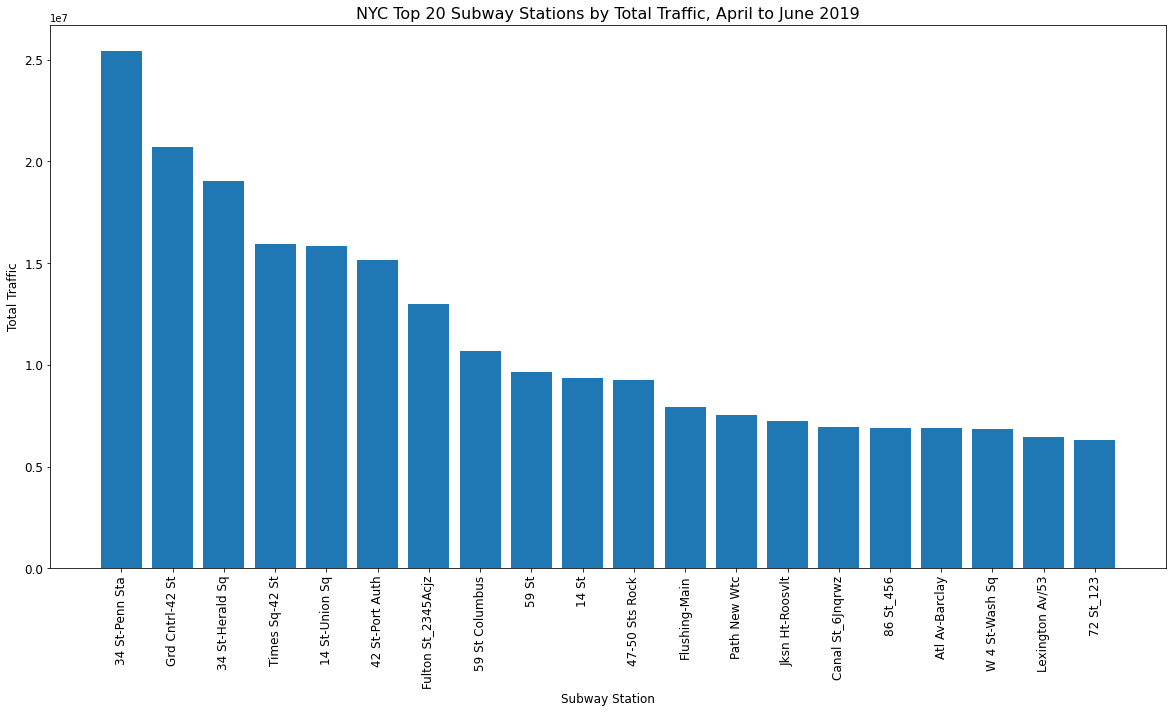

In [218]:
plt.figure(figsize=[20,10])
plt.bar(df_MTA_2019_top20.Station, df_MTA_2019_top20.DAILY_TRAFFIC)
plt.title('NYC Top 20 Subway Stations by Total Traffic, April to June 2019',fontsize=16)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Subway Station',fontsize=12)
plt.ylabel('Total Traffic',fontsize=12)
plt.savefig('top_20_stations.png');

In [219]:
df_MTA_2019_stations = df_MTA_2019_daily.groupby('Station')[['DAILY_TRAFFIC']].sum()

In [220]:
df_MTA_2019_stations.reset_index(inplace=True)

In [221]:
df_MTA_2019_stations.rename(columns={'DAILY_TRAFFIC':'total_traffic'},inplace=True)

In [223]:
df_MTA_2019_stations['traffic_pctile'] = df_MTA_2019_stations.total_traffic.rank(pct=True)

In [224]:
df_MTA_2019_stations.head()

,Station,total_traffic,traffic_pctile
0,1 Av,3042273.0,0.868996
1,103 St-Corona,2793633.0,0.838428
2,103 St_1,1413910.0,0.620087
3,103 St_6,1971158.0,0.744541
4,103 St_Bc,674654.0,0.323144


In [225]:
df_MTA_2019_stations['traffic_score'] = 10*df_MTA_2019_stations['traffic_pctile']

In [226]:
df_MTA_2019_stations = df_MTA_2019_stations.sort_values(by='total_traffic',ascending=False)

In [227]:
df_MTA_2019_stations.reset_index(drop=True,inplace=True)

In [228]:
df_MTA_2019_stations.head()

,Station,total_traffic,traffic_pctile,traffic_score
0,34 St-Penn Sta,25447503.0,1.000000,10.000000
1,Grd Cntrl-42 St,20695879.0,0.997817,9.978166
2,34 St-Herald Sq,19030522.0,0.995633,9.956332
3,Times Sq-42 St,15928589.0,0.993450,9.934498
4,14 St-Union Sq,15839023.0,0.991266,9.912664


In [229]:
len(df_MTA_2019_stations)

458

In [230]:
list_stations_traffic = list(df_MTA_2019_stations.Station)

In [231]:
list1 = list(df_MTA_2019_top20['Station'])

In [232]:
list1

['34 St-Penn Sta',
 'Grd Cntrl-42 St',
 '34 St-Herald Sq',
 'Times Sq-42 St',
 '14 St-Union Sq',
 '42 St-Port Auth',
 'Fulton St_2345Acjz',
 '59 St Columbus',
 '59 St',
 '14 St',
 '47-50 Sts Rock',
 'Flushing-Main',
 'Path New Wtc',
 'Jksn Ht-Roosvlt',
 'Canal St_6Jnqrwz',
 '86 St_456',
 'Atl Av-Barclay',
 'W 4 St-Wash Sq',
 'Lexington Av/53',
 '72 St_123']

In [340]:
df_subway_income = nyc_subway_final.groupby('Stop Name')[['HHIncomePct_score']].mean()

In [341]:
df_subway_income.reset_index(inplace=True)

In [342]:
df_subway_income.head()

,Stop Name,HHIncomePct_score
0,1 Av,8.0
1,103 St,1.0
2,103 St - Corona Plaza,4.0
3,104 St,6.5
4,110 St,3.0


In [345]:
df_subway_income.loc[df_subway_income["Stop Name"] == "42 St - Port Authority Bus Terminal"]

,Stop Name,HHIncomePct_score
67,42 St - Port Authority Bus Terminal,10.0


In [343]:
list_stations_income = list(df_subway_income['Stop Name'])

In [344]:
list_stations_income

['1 Av',
 '103 St',
 '103 St - Corona Plaza',
 '104 St',
 '110 St',
 '111 St',
 '116 St',
 '116 St - Columbia University',
 '121 St',
 '125 St',
 '135 St',
 '137 St - City College',
 '138 St - Grand Concourse',
 '14 St',
 '14 St - Union Sq',
 '145 St',
 '149 St - Grand Concourse',
 '15 St - Prospect Park',
 '155 St',
 '157 St',
 '161 St - Yankee Stadium',
 '163 St - Amsterdam Av',
 '167 St',
 '168 St',
 '168 St - Washington Hts',
 '169 St',
 '170 St',
 '174 St',
 '174-175 Sts',
 '175 St',
 '176 St',
 '18 Av',
 '18 St',
 '181 St',
 '182-183 Sts',
 '183 St',
 '190 St',
 '191 St',
 '2 Av',
 '20 Av',
 '207 St',
 '21 St',
 '21 St - Queensbridge',
 '215 St',
 '219 St',
 '225 St',
 '23 St',
 '231 St',
 '233 St',
 '238 St',
 '25 Av',
 '25 St',
 '28 St',
 '3 Av',
 '3 Av - 138 St',
 '3 Av - 149 St',
 '30 Av',
 '33 St',
 '34 St - 11 Av',
 '34 St - Herald Sq',
 '34 St - Penn Station',
 '36 Av',
 '36 St',
 '39 Av',
 '4 Av',
 '40 St',
 '42 St - Bryant Pk',
 '42 St - Port Authority Bus Terminal',
 '4

In [313]:
# import fuzzywyzzy, a Python library that uses Levenshtein Distance to calculate the differences between 
# sequences (strings) in a simple-to-use package
# https://github.com/seatgeek/fuzzywuzzy
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [260]:
# df_subway_income.iloc[df_subway_income.loc[df_subway_income['Stop Name'] == '34 St - Penn Station'].index,0] = '34 St-Penn Sta'

In [261]:
# df_subway_income.iloc[df_subway_income.loc[df_subway_income['Stop Name'] == 'Grand Central - 42 St'].index,0] = 'Grd Cntrl-42 St'

In [262]:
# df_subway_income.iloc[df_subway_income.loc[df_subway_income['Stop Name'] == '42 St - Port Authority Bus Terminal'].index,0] = '42 St-Port Auth'

In [263]:
# df_subway_income.iloc[df_subway_income.loc[df_subway_income['Stop Name'] == 'Times Sq - 42 St'].index,0] = 'Times Sq-42 St'

In [264]:
# df_MTA_2019_stations.drop(columns=["Station_fuzzy"],inplace=True)

In [315]:
df_MTA_2019_stations["station_fuzzy"] = ""

In [316]:
df_MTA_2019_stations.head()

,Station,total_traffic,traffic_pctile,traffic_score,station_fuzzy
0,34 St-Penn Sta,25447503.0,1.000000,10.000000,
1,Grd Cntrl-42 St,20695879.0,0.997817,9.978166,
2,34 St-Herald Sq,19030522.0,0.995633,9.956332,
3,Times Sq-42 St,15928589.0,0.993450,9.934498,
4,14 St-Union Sq,15839023.0,0.991266,9.912664,


In [317]:
for i in range(0,len(df_MTA_2019_stations)):
    df_MTA_2019_stations.iloc[i,4] = (process
                                      .extract(df_MTA_2019_stations
                                               .iloc[i,0], 
                                               list_stations_income, 
                                               scorer=fuzz.token_sort_ratio))[0][0]

In [318]:
# compare Station to station_fuzzy, everything looks good so far!
df_MTA_2019_stations[0:10]

,Station,total_traffic,traffic_pctile,traffic_score,station_fuzzy
0,34 St-Penn Sta,25447503.0,1.000000,10.000000,34 St - Penn Station
1,Grd Cntrl-42 St,20695879.0,0.997817,9.978166,Grand Central - 42 St
2,34 St-Herald Sq,19030522.0,0.995633,9.956332,34 St - Herald Sq
3,Times Sq-42 St,15928589.0,0.993450,9.934498,Times Sq - 42 St
4,14 St-Union Sq,15839023.0,0.991266,9.912664,14 St - Union Sq
5,42 St-Port Auth,15163147.0,0.989083,9.890830,42 St - Bryant Pk
6,Fulton St_2345Acjz,12994251.0,0.986900,9.868996,Fulton St
7,59 St Columbus,10674585.0,0.984716,9.847162,59 St - Columbus Circle
8,59 St,9640007.0,0.982533,9.825328,59 St
9,14 St,9350901.0,0.980349,9.803493,14 St


In [255]:
# compare for next 10 subway stations, row index 18 looks wrong (Path New Wtc vs New Utrecht Av)
df_MTA_2019_stations[10:20]

,Station,total_traffic,traffic_pctile,traffic_score,station_fuzzy
10,47-50 Sts Rock,9237125.0,0.978166,9.781659,47-50 Sts - Rockefeller Ctr
11,Flushing-Main,7929276.0,0.975983,9.759825,Flushing - Main St
12,Path New Wtc,7545951.0,0.973799,9.737991,New Utrecht Av
13,Jksn Ht-Roosvlt,7239765.0,0.971616,9.716157,Jackson Hts - Roosevelt Av
14,Canal St_6Jnqrwz,6925707.0,0.969432,9.694323,Canal St
15,86 St_456,6910964.0,0.967249,9.672489,86 St
16,Atl Av-Barclay,6886199.0,0.965066,9.650655,Atlantic Av - Barclays Ctr
17,W 4 St-Wash Sq,6865617.0,0.962882,9.628821,Times Sq - 42 St
18,Lexington Av/53,6451133.0,0.960699,9.606987,Lexington Av/53 St
19,72 St_123,6293500.0,0.958515,9.585153,72 St


In [319]:
# manually change station_fuzzy to WTC Cortlandt (based on online research, google maps)
df_MTA_2019_stations.loc[df_MTA_2019_stations.Station == '42 St-Port Auth','station_fuzzy'] = '42 St - Port Authority Bus Terminal'

In [320]:
# manually change station_fuzzy to WTC Cortlandt (based on online research, google maps)
df_MTA_2019_stations.loc[df_MTA_2019_stations.Station == 'Path New Wtc','station_fuzzy'] = 'WTC Cortlandt'

In [274]:
# looks good now!
df_MTA_2019_stations[10:20]

,Station,total_traffic,traffic_pctile,traffic_score,station_fuzzy
10,47-50 Sts Rock,9237125.0,0.978166,9.781659,47-50 Sts - Rockefeller Ctr
11,Flushing-Main,7929276.0,0.975983,9.759825,Flushing - Main St
12,Path New Wtc,7545951.0,0.973799,9.737991,WTC Cortlandt
13,Jksn Ht-Roosvlt,7239765.0,0.971616,9.716157,Jackson Hts - Roosevelt Av
14,Canal St_6Jnqrwz,6925707.0,0.969432,9.694323,Canal St
15,86 St_456,6910964.0,0.967249,9.672489,86 St
16,Atl Av-Barclay,6886199.0,0.965066,9.650655,Atlantic Av - Barclays Ctr
17,W 4 St-Wash Sq,6865617.0,0.962882,9.628821,Times Sq - 42 St
18,Lexington Av/53,6451133.0,0.960699,9.606987,Lexington Av/53 St
19,72 St_123,6293500.0,0.958515,9.585153,72 St


In [247]:
# look at next 10 rows, index 24 looks like a mismatch
df_MTA_2019_stations[20:30]

,Station,total_traffic,traffic_pctile,traffic_score,station_fuzzy
20,50 St,7387360.5,0.947090,9.470899,50 St
21,Jksn Ht-Roosvlt,7239775.0,0.944444,9.444444,Jackson Hts - Roosevelt Av
22,28 St,7029018.0,0.941799,9.417989,28 St
23,Atl Av-Barclay,6926942.5,0.939153,9.391534,Atlantic Av - Barclays Ctr
24,W 4 St-Wash Sq,6865688.0,0.936508,9.365079,Times Sq - 42 St
25,Lexington Av/53,6451253.0,0.933862,9.338624,Lexington Av/53 St
26,42 St-Bryant Pk,6150202.0,0.931217,9.312169,42 St - Bryant Pk
27,Wall St,6083357.0,0.928571,9.285714,Wall St
28,7 Av,6041823.0,0.925926,9.259259,7 Av
29,8 Av,5181335.0,0.923280,9.232804,8 Av


In [275]:
# let's see the other results from fuzzywuzzy for the string 'W 4 St-Wash Sq'
process.extract('W 4 St-Wash Sq',list_stations_income, scorer=fuzz.token_sort_ratio)

[('Times Sq - 42 St', 64),
 ('W 4 St', 60),
 ('14 St - Union Sq', 57),
 ('168 St - Washington Hts', 57),
 ('Union Sq - 14 St', 57)]

In [321]:
# manually change station_fuzzy to 'W 4 St' (based on online research, google maps)
df_MTA_2019_stations.loc[df_MTA_2019_stations.Station == 'W 4 St-Wash Sq','station_fuzzy'] = 'W 4 St'

In [277]:
# looks good now!
df_MTA_2019_stations[20:30]

,Station,total_traffic,traffic_pctile,traffic_score,station_fuzzy
20,96 St_123,6184069.0,0.956332,9.563319,96 St
21,42 St-Bryant Pk,6147699.0,0.954148,9.541485,42 St - Bryant Pk
22,57 St-7 Av,4989196.0,0.951965,9.519651,57 St - 7 Av
23,Jamaica Center,4874561.0,0.949782,9.497817,Jamaica Center - Parsons/Archer
24,72 St-2 Ave,4549131.0,0.947598,9.475983,57 St - 7 Av
25,Jay St-Metrotec_Acf,4494921.0,0.945415,9.454148,Jay St - MetroTech
26,Borough Hall,4465664.0,0.943231,9.432314,Borough Hall
27,125 St_Abcd,4357090.0,0.941048,9.410480,125 St
28,Bowling Green,4347155.0,0.938865,9.388646,Bowling Green
29,125 St_456,4197425.0,0.936681,9.366812,125 St


In [278]:
df_MTA_2019_stations[40:50]

,Station,total_traffic,traffic_pctile,traffic_score,station_fuzzy
40,Crown Hts-Utica,3668929.0,0.912664,9.126638,Crown Hts - Utica Av
41,Bedford Av,3597374.0,0.910480,9.104803,Bedford Av
42,23 St_Fm,3584663.0,0.908297,9.082969,23 St
43,145 St_Abcd,3577308.0,0.906114,9.061135,145 St
44,86 St-2 Ave,3566979.0,0.903930,9.039301,5 Av/53 St
45,Wall St_23,3558693.0,0.901747,9.017467,Wall St
46,Grand St_Bd,3513974.0,0.899563,8.995633,Grand St
47,Chambers St_23Ace,3485843.0,0.897380,8.973799,Chambers St
48,Sutphin-Archer,3481969.0,0.895197,8.951965,Sutphin Blvd
49,Lexington Av/63,3479988.0,0.893013,8.930131,Lexington Av/63 St


In [322]:
df_MTA_2019_stations.loc[df_MTA_2019_stations.Station == '72 St-2 Ave','station_fuzzy'] = '72 St'

In [323]:
df_MTA_2019_stations.loc[df_MTA_2019_stations.Station == "B'Way-Lafayette",'station_fuzzy'] = "Broadway-Lafayette St"

In [283]:
df_MTA_2019_stations.shape

(458, 5)

In [285]:
df_subway_income.shape

(377, 2)

In [289]:
df_MTA_2019_stations[30:40]

,Station,total_traffic,traffic_pctile,traffic_score,station_fuzzy
30,B'Way-Lafayette,4167133.0,0.934498,9.344978,Broadway-Lafayette St
31,Journal Square,4105982.0,0.932314,9.323144,Court Sq
32,5 Av/53 St,4086190.0,0.930131,9.301310,5 Av/53 St
33,50 St_1,4063076.0,0.927948,9.279476,50 St
34,77 St_6,3986805.0,0.925764,9.257642,77 St
35,33 St,3963276.0,0.923581,9.235808,33 St
36,Kew Gardens,3956695.0,0.921397,9.213974,Kew Gardens - Union Tpke
37,Delancey/Essex,3918805.0,0.919214,9.192140,Delancey St
38,23 St_6,3831223.0,0.917031,9.170306,23 St
39,161/Yankee Stad,3682346.0,0.914847,9.148472,161 St - Yankee Stadium


In [349]:
# join df_MTA_2019_stations with df_subway_income 
df_final = df_MTA_2019_stations.merge(df_subway_income, how='left', left_on='station_fuzzy', right_on='Stop Name')

In [347]:
df_final.head(10)

,Station,total_traffic,traffic_pctile,traffic_score,station_fuzzy,Stop Name,HHIncomePct_score
0,34 St-Penn Sta,25447503.0,1.000000,10.000000,34 St - Penn Station,34 St - Penn Station,10.0
1,Grd Cntrl-42 St,20695879.0,0.997817,9.978166,Grand Central - 42 St,Grand Central - 42 St,10.0
2,34 St-Herald Sq,19030522.0,0.995633,9.956332,34 St - Herald Sq,34 St - Herald Sq,10.0
3,Times Sq-42 St,15928589.0,0.993450,9.934498,Times Sq - 42 St,Times Sq - 42 St,10.0
4,14 St-Union Sq,15839023.0,0.991266,9.912664,14 St - Union Sq,14 St - Union Sq,10.0
5,42 St-Port Auth,15163147.0,0.989083,9.890830,42 St - Port Authority Bus Terminal,42 St - Port Authority Bus Terminal,10.0
6,Fulton St_2345Acjz,12994251.0,0.986900,9.868996,Fulton St,Fulton St,9.5
7,59 St Columbus,10674585.0,0.984716,9.847162,59 St - Columbus Circle,59 St - Columbus Circle,10.0
8,59 St,9640007.0,0.982533,9.825328,59 St,59 St,6.0
9,14 St,9350901.0,0.980349,9.803493,14 St,14 St,10.0


In [260]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378 entries, 0 to 377
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Station            378 non-null    object 
 1   total_traffic      378 non-null    float64
 2   traffic_pctile     378 non-null    float64
 3   traffic_score      378 non-null    float64
 4   station_fuzzy      378 non-null    object 
 5   Stop Name          374 non-null    object 
 6   HHIncomePct_score  365 non-null    float64
dtypes: float64(4), object(3)
memory usage: 23.6+ KB


In [354]:
df_final.drop(columns=['station_fuzzy','Stop Name'],inplace=True)

In [355]:
# subjective decision, weight traffic by 70%, hh income by 30%
weight1 = 0.7
weight2 = 1-weight1
df_final['weighted_score'] = weight1*df_final['traffic_score'] + weight2*df_final['HHIncomePct_score']

In [356]:
df_final = df_final.sort_values(by='weighted_score',ascending=False).head(5)

In [357]:
df_final.reset_index(drop=True,inplace=True)

In [358]:
df_final

,Station,total_traffic,traffic_pctile,traffic_score,HHIncomePct_score,weighted_score
0,34 St-Penn Sta,25447503.0,1.000000,10.000000,10.0,10.000000
1,Grd Cntrl-42 St,20695879.0,0.997817,9.978166,10.0,9.984716
2,34 St-Herald Sq,19030522.0,0.995633,9.956332,10.0,9.969432
3,Times Sq-42 St,15928589.0,0.993450,9.934498,10.0,9.954148
4,14 St-Union Sq,15839023.0,0.991266,9.912664,10.0,9.938865


In [359]:
list5 = list(df_final.Station)

In [360]:
df_MTA_2019_daily['STATION'] = df_MTA_2019_daily['STATION'].apply(proper)

In [361]:
df_MTA_2019_top5 = df_MTA_2019_daily.loc[df_MTA_2019_daily.STATION.isin(list5)]

In [362]:
df_MTA_2019_top5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27379 entries, 5263 to 337079
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   C/A               27379 non-null  object        
 1   UNIT              27379 non-null  object        
 2   SCP               27379 non-null  object        
 3   STATION           27379 non-null  object        
 4   DATE              27379 non-null  object        
 5   ENTRIES           27379 non-null  int64         
 6   EXITS             27379 non-null  int64         
 7   PREV_DATE         27379 non-null  object        
 8   PREV_ENTRIES      27379 non-null  float64       
 9   PREV_EXITS        27379 non-null  float64       
 10  DAILY_ENTRIES     27379 non-null  float64       
 11  unique_turnstile  27379 non-null  object        
 12  DAILY_EXITS       27379 non-null  float64       
 13  Station           27379 non-null  object        
 14  DAILY_TRAFFIC     

In [363]:
df_MTA_2019_top5["DAY"] = df_MTA_2019_top5["DATE_TIME"].dt.day_name()

In [364]:
len(df_MTA_2019_daily)

427425

In [365]:
len(df_MTA_2019_top5)

27379

In [366]:
df_MTA_2019_top5.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,unique_turnstile,DAILY_EXITS,Station,DAILY_TRAFFIC,DATE_TIME,year,month,period,DAY
5263,A021,R032,01-00-00,Times Sq-42 St,03/31/2019,8694916,10644571,03/30/2019,8693348.0,10641864.0,1568.0,A021_R032_01-00-00_TIMES SQ-42 ST,2707.0,Times Sq-42 St,4275.0,2019-03-31,2019,3,2019_03,Sunday
5264,A021,R032,01-00-00,Times Sq-42 St,04/01/2019,8696076,10646288,03/31/2019,8694916.0,10644571.0,1160.0,A021_R032_01-00-00_TIMES SQ-42 ST,1717.0,Times Sq-42 St,2877.0,2019-04-01,2019,4,2019_04,Monday
5265,A021,R032,01-00-00,Times Sq-42 St,04/02/2019,8699726,10651113,04/01/2019,8696076.0,10646288.0,3650.0,A021_R032_01-00-00_TIMES SQ-42 ST,4825.0,Times Sq-42 St,8475.0,2019-04-02,2019,4,2019_04,Tuesday
5266,A021,R032,01-00-00,Times Sq-42 St,04/03/2019,8703567,10656188,04/02/2019,8699726.0,10651113.0,3841.0,A021_R032_01-00-00_TIMES SQ-42 ST,5075.0,Times Sq-42 St,8916.0,2019-04-03,2019,4,2019_04,Wednesday
5267,A021,R032,01-00-00,Times Sq-42 St,04/04/2019,8707382,10661399,04/03/2019,8703567.0,10656188.0,3815.0,A021_R032_01-00-00_TIMES SQ-42 ST,5211.0,Times Sq-42 St,9026.0,2019-04-04,2019,4,2019_04,Thursday


In [367]:
# much fewer values for Saturday
df_MTA_2019_top5.DAY.value_counts()

Monday       3983
Sunday       3965
Tuesday      3948
Wednesday    3945
Friday       3944
Thursday     3941
Saturday     3653
Name: DAY, dtype: int64

In [368]:
# 2019-06-22 is the last Saturday in the dataset
date_range = pd.date_range(start="6/21/2019",end="6/22/2019")

In [369]:
date_range[1]

Timestamp('2019-06-22 00:00:00', freq='D')

In [370]:
# filter df_MTA_2019_top10 so 6/22 is the last day (since it is a Saturday)
df_MTA_2019_top5 = df_MTA_2019_top5[df_MTA_2019_top5.DATE_TIME <= date_range[1]]

In [371]:
# great, now value counts look similar for all days of the week
df_MTA_2019_top5.DAY.value_counts()

Monday       3674
Sunday       3655
Saturday     3653
Tuesday      3640
Friday       3638
Wednesday    3638
Thursday     3633
Name: DAY, dtype: int64

In [372]:
df_MTA_2019_top5_weekday = df_MTA_2019_top5.groupby('DAY')['DAILY_TRAFFIC'].sum()

In [373]:
df_MTA_2019_top5_weekday.sort_values(ascending=False,inplace=True)

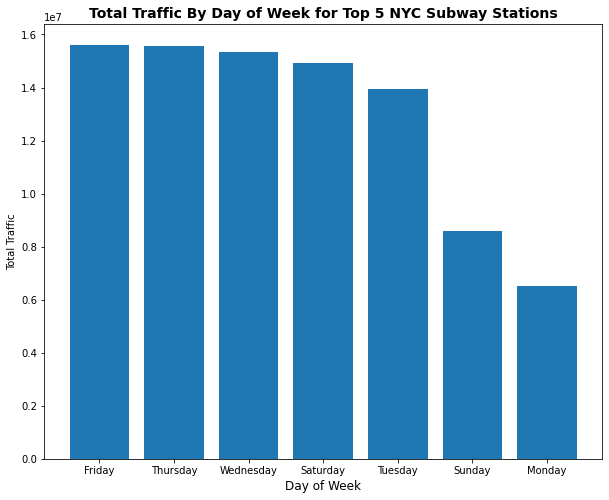

In [375]:
plt.figure(figsize=[10,8])
plt.bar(df_MTA_2019_top5_weekday.index, df_MTA_2019_top5_weekday)
plt.title('Total Traffic By Day of Week for Top 5 NYC Subway Stations',weight='bold',fontsize=14)
plt.xlabel('Day of Week',fontsize=12)
plt.ylabel('Total Traffic');

In [376]:
df_MTA_2019['STATION'] = df_MTA_2019['STATION'].apply(proper)

In [377]:
df_MTA_2019_top5_day_hour = df_MTA_2019[df_MTA_2019.STATION.isin(list5)]

In [378]:
df_MTA_2019_top5_day_hour.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,YEAR,station_linename
2684,A021,R032,01-00-00,Times Sq-42 St,1237ACENQRSW,BMT,03/30/2019,00:00:00,REGULAR,8693348,10641864,2019-03-30 00:00:00,2019,TIMES SQ-42 ST_1237ACENQRSW
2685,A021,R032,01-00-00,Times Sq-42 St,1237ACENQRSW,BMT,03/30/2019,04:00:00,REGULAR,8693471,10641914,2019-03-30 04:00:00,2019,TIMES SQ-42 ST_1237ACENQRSW
2686,A021,R032,01-00-00,Times Sq-42 St,1237ACENQRSW,BMT,03/30/2019,08:00:00,REGULAR,8693564,10642039,2019-03-30 08:00:00,2019,TIMES SQ-42 ST_1237ACENQRSW
2687,A021,R032,01-00-00,Times Sq-42 St,1237ACENQRSW,BMT,03/30/2019,12:00:00,REGULAR,8693787,10642708,2019-03-30 12:00:00,2019,TIMES SQ-42 ST_1237ACENQRSW
2688,A021,R032,01-00-00,Times Sq-42 St,1237ACENQRSW,BMT,03/30/2019,16:00:00,REGULAR,8694183,10643461,2019-03-30 16:00:00,2019,TIMES SQ-42 ST_1237ACENQRSW


In [379]:
df_MTA_2019_top5_day_hour[df_MTA_2019_top5_day_hour.DATE == '06/22/2019'].DATE_TIME

2478     2019-06-22 00:00:00
2479     2019-06-22 04:00:00
2480     2019-06-22 08:00:00
2481     2019-06-22 12:00:00
2482     2019-06-22 16:00:00
                 ...        
160984   2019-06-22 05:00:00
160985   2019-06-22 09:00:00
160986   2019-06-22 13:00:00
160987   2019-06-22 17:00:00
160988   2019-06-22 21:00:00
Name: DATE_TIME, Length: 1859, dtype: datetime64[ns]

In [380]:
date_range2 = pd.date_range(start='6/22/2019',end='6/23/2019')

In [381]:
date_range2[1]

Timestamp('2019-06-23 00:00:00', freq='D')

In [382]:
df_MTA_2019_top5_day_hour = df_MTA_2019_top5_day_hour[df_MTA_2019_top5_day_hour.DATE_TIME < date_range2[1]]

In [383]:
len(df_MTA_2019_top5_day_hour)

161519

In [384]:
df_MTA_2019_top5_day_hour["DAY"] = df_MTA_2019_top5_day_hour["DATE_TIME"].dt.day_name()

In [385]:
df_MTA_2019_top5_day_hour.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,YEAR,station_linename,DAY
2684,A021,R032,01-00-00,Times Sq-42 St,1237ACENQRSW,BMT,03/30/2019,00:00:00,REGULAR,8693348,10641864,2019-03-30 00:00:00,2019,TIMES SQ-42 ST_1237ACENQRSW,Saturday
2685,A021,R032,01-00-00,Times Sq-42 St,1237ACENQRSW,BMT,03/30/2019,04:00:00,REGULAR,8693471,10641914,2019-03-30 04:00:00,2019,TIMES SQ-42 ST_1237ACENQRSW,Saturday
2686,A021,R032,01-00-00,Times Sq-42 St,1237ACENQRSW,BMT,03/30/2019,08:00:00,REGULAR,8693564,10642039,2019-03-30 08:00:00,2019,TIMES SQ-42 ST_1237ACENQRSW,Saturday
2687,A021,R032,01-00-00,Times Sq-42 St,1237ACENQRSW,BMT,03/30/2019,12:00:00,REGULAR,8693787,10642708,2019-03-30 12:00:00,2019,TIMES SQ-42 ST_1237ACENQRSW,Saturday
2688,A021,R032,01-00-00,Times Sq-42 St,1237ACENQRSW,BMT,03/30/2019,16:00:00,REGULAR,8694183,10643461,2019-03-30 16:00:00,2019,TIMES SQ-42 ST_1237ACENQRSW,Saturday


In [389]:
# create a new column "HOUR" to extract the hour from datetime timestamps
df_MTA_2019_top5_day_hour["HOUR"] = df_MTA_2019_top5_day_hour.DATE_TIME.dt.hour

In [390]:
df_MTA_2019_top5_day_hour.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,YEAR,station_linename,DAY,HOUR
2684,A021,R032,01-00-00,Times Sq-42 St,1237ACENQRSW,BMT,03/30/2019,00:00:00,REGULAR,8693348,10641864,2019-03-30 00:00:00,2019,TIMES SQ-42 ST_1237ACENQRSW,Saturday,0
2685,A021,R032,01-00-00,Times Sq-42 St,1237ACENQRSW,BMT,03/30/2019,04:00:00,REGULAR,8693471,10641914,2019-03-30 04:00:00,2019,TIMES SQ-42 ST_1237ACENQRSW,Saturday,4
2686,A021,R032,01-00-00,Times Sq-42 St,1237ACENQRSW,BMT,03/30/2019,08:00:00,REGULAR,8693564,10642039,2019-03-30 08:00:00,2019,TIMES SQ-42 ST_1237ACENQRSW,Saturday,8
2687,A021,R032,01-00-00,Times Sq-42 St,1237ACENQRSW,BMT,03/30/2019,12:00:00,REGULAR,8693787,10642708,2019-03-30 12:00:00,2019,TIMES SQ-42 ST_1237ACENQRSW,Saturday,12
2688,A021,R032,01-00-00,Times Sq-42 St,1237ACENQRSW,BMT,03/30/2019,16:00:00,REGULAR,8694183,10643461,2019-03-30 16:00:00,2019,TIMES SQ-42 ST_1237ACENQRSW,Saturday,16
2689,A021,R032,01-00-00,Times Sq-42 St,1237ACENQRSW,BMT,03/30/2019,20:00:00,REGULAR,8694637,10644230,2019-03-30 20:00:00,2019,TIMES SQ-42 ST_1237ACENQRSW,Saturday,20
2690,A021,R032,01-00-00,Times Sq-42 St,1237ACENQRSW,BMT,03/31/2019,00:00:00,REGULAR,8694916,10644571,2019-03-31 00:00:00,2019,TIMES SQ-42 ST_1237ACENQRSW,Sunday,0
2691,A021,R032,01-00-00,Times Sq-42 St,1237ACENQRSW,BMT,03/31/2019,04:00:00,REGULAR,8695005,10644622,2019-03-31 04:00:00,2019,TIMES SQ-42 ST_1237ACENQRSW,Sunday,4
2692,A021,R032,01-00-00,Times Sq-42 St,1237ACENQRSW,BMT,03/31/2019,08:00:00,REGULAR,8695059,10644687,2019-03-31 08:00:00,2019,TIMES SQ-42 ST_1237ACENQRSW,Sunday,8
2693,A021,R032,01-00-00,Times Sq-42 St,1237ACENQRSW,BMT,03/31/2019,12:00:00,REGULAR,8695229,10645140,2019-03-31 12:00:00,2019,TIMES SQ-42 ST_1237ACENQRSW,Sunday,12


In [391]:
df_MTA_2019_top5_day_hour = (df_MTA_2019_top5_day_hour[df_MTA_2019_top5_day_hour
                                                       .DAY
                                                       .isin(["Friday","Thursday","Wednesday"])])

In [392]:
df_MTA_2019_top5_day_hour["PREV_TIMESTAMP_TEMP"] = (df_MTA_2019_top5_day_hour
                                                    .groupby(["C/A", "UNIT", "SCP", "STATION"])
                                                    .DATE_TIME
                                                    .apply(lambda group: group.shift(1)))

In [394]:
df_MTA_2019_top5_days_hour[["DATE_TIME", "PREV_TIMESTAMP_TEMP"]]

,DATE_TIME,PREV_TIMESTAMP_TEMP
2708,2019-04-03 00:00:00,NaT
2709,2019-04-03 04:00:00,2019-04-03 00:00:00
2710,2019-04-03 08:00:00,2019-04-03 04:00:00
2711,2019-04-03 12:00:00,2019-04-03 08:00:00
2712,2019-04-03 16:00:00,2019-04-03 12:00:00
...,...,...
162534,2019-06-21 08:45:25,2019-06-21 08:44:04
162535,2019-06-21 09:00:00,2019-06-21 08:45:25
162536,2019-06-21 13:00:00,2019-06-21 09:00:00
162537,2019-06-21 17:00:00,2019-06-21 13:00:00


In [512]:
df_MTA_2019_top5_day_hour["PREV_TIMESTAMP"] = np.nan

In [513]:
df_MTA_2019_top5_day_hour.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,YEAR,DAY,HOUR,PREV_TIMESTAMP
3044,A022,R022,01-00-00,34 St-Herald Sq,BDFMNQRW,BMT,04/03/2019,00:00:00,REGULAR,26727727,11058560,2019-04-03 00:00:00,2019,Wednesday,0,NaN
3045,A022,R022,01-00-00,34 St-Herald Sq,BDFMNQRW,BMT,04/03/2019,04:00:00,REGULAR,26727816,11058576,2019-04-03 04:00:00,2019,Wednesday,4,NaN
3046,A022,R022,01-00-00,34 St-Herald Sq,BDFMNQRW,BMT,04/03/2019,08:00:00,REGULAR,26727962,11058776,2019-04-03 08:00:00,2019,Wednesday,8,NaN
3047,A022,R022,01-00-00,34 St-Herald Sq,BDFMNQRW,BMT,04/03/2019,12:00:00,REGULAR,26728615,11060004,2019-04-03 12:00:00,2019,Wednesday,12,NaN
3048,A022,R022,01-00-00,34 St-Herald Sq,BDFMNQRW,BMT,04/03/2019,16:00:00,REGULAR,26729756,11060687,2019-04-03 16:00:00,2019,Wednesday,16,NaN


In [514]:
df_MTA_2019_top5_day_hour.reset_index(drop=True,inplace=True)

In [515]:
df_MTA_2019_top5_day_hour.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,YEAR,DAY,HOUR,PREV_TIMESTAMP
0,A022,R022,01-00-00,34 St-Herald Sq,BDFMNQRW,BMT,04/03/2019,00:00:00,REGULAR,26727727,11058560,2019-04-03 00:00:00,2019,Wednesday,0,NaN
1,A022,R022,01-00-00,34 St-Herald Sq,BDFMNQRW,BMT,04/03/2019,04:00:00,REGULAR,26727816,11058576,2019-04-03 04:00:00,2019,Wednesday,4,NaN
2,A022,R022,01-00-00,34 St-Herald Sq,BDFMNQRW,BMT,04/03/2019,08:00:00,REGULAR,26727962,11058776,2019-04-03 08:00:00,2019,Wednesday,8,NaN
3,A022,R022,01-00-00,34 St-Herald Sq,BDFMNQRW,BMT,04/03/2019,12:00:00,REGULAR,26728615,11060004,2019-04-03 12:00:00,2019,Wednesday,12,NaN
4,A022,R022,01-00-00,34 St-Herald Sq,BDFMNQRW,BMT,04/03/2019,16:00:00,REGULAR,26729756,11060687,2019-04-03 16:00:00,2019,Wednesday,16,NaN


In [516]:
for i in range(1,len(df_MTA_2019_top5_day_hour)):
    if ((df_MTA_2019_top5_day_hour.iloc[i,0] == df_MTA_2019_top5_day_hour.iloc[i-1,0])
        and df_MTA_2019_top5_day_hour.iloc[i,1] == df_MTA_2019_top5_day_hour.iloc[i-1,1]
        and df_MTA_2019_top5_day_hour.iloc[i,2] == df_MTA_2019_top5_day_hour.iloc[i-1,2]
        and df_MTA_2019_top5_day_hour.iloc[i,3] == df_MTA_2019_top5_day_hour.iloc[i-1,3]):
        df_MTA_2019_top5_day_hour.iloc[i,len(df_MTA_2019_top5_day_hour.columns)-1] = df_MTA_2019_top5_day_hour.iloc[i-1,11]
    else:
        df_MTA_2019_top5_day_hour.iloc[i,len(df_MTA_2019_top5_day_hour.columns)-1] = np.nan

In [517]:
df_MTA_2019_top5_day_hour.head(20)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,YEAR,DAY,HOUR,PREV_TIMESTAMP
0,A022,R022,01-00-00,34 St-Herald Sq,BDFMNQRW,BMT,04/03/2019,00:00:00,REGULAR,26727727,11058560,2019-04-03 00:00:00,2019,Wednesday,0,NaN
1,A022,R022,01-00-00,34 St-Herald Sq,BDFMNQRW,BMT,04/03/2019,04:00:00,REGULAR,26727816,11058576,2019-04-03 04:00:00,2019,Wednesday,4,2019-04-03 00:00:00
2,A022,R022,01-00-00,34 St-Herald Sq,BDFMNQRW,BMT,04/03/2019,08:00:00,REGULAR,26727962,11058776,2019-04-03 08:00:00,2019,Wednesday,8,2019-04-03 04:00:00
3,A022,R022,01-00-00,34 St-Herald Sq,BDFMNQRW,BMT,04/03/2019,12:00:00,REGULAR,26728615,11060004,2019-04-03 12:00:00,2019,Wednesday,12,2019-04-03 08:00:00
4,A022,R022,01-00-00,34 St-Herald Sq,BDFMNQRW,BMT,04/03/2019,16:00:00,REGULAR,26729756,11060687,2019-04-03 16:00:00,2019,Wednesday,16,2019-04-03 12:00:00
5,A022,R022,01-00-00,34 St-Herald Sq,BDFMNQRW,BMT,04/03/2019,20:00:00,REGULAR,26732231,11061206,2019-04-03 20:00:00,2019,Wednesday,20,2019-04-03 16:00:00
6,A022,R022,01-00-00,34 St-Herald Sq,BDFMNQRW,BMT,04/04/2019,00:00:00,REGULAR,26733187,11061431,2019-04-04 00:00:00,2019,Thursday,0,2019-04-03 20:00:00
7,A022,R022,01-00-00,34 St-Herald Sq,BDFMNQRW,BMT,04/04/2019,04:00:00,REGULAR,26733275,11061449,2019-04-04 04:00:00,2019,Thursday,4,2019-04-04 00:00:00
8,A022,R022,01-00-00,34 St-Herald Sq,BDFMNQRW,BMT,04/04/2019,08:00:00,REGULAR,26733401,11061661,2019-04-04 08:00:00,2019,Thursday,8,2019-04-04 04:00:00
9,A022,R022,01-00-00,34 St-Herald Sq,BDFMNQRW,BMT,04/04/2019,12:00:00,REGULAR,26734060,11062746,2019-04-04 12:00:00,2019,Thursday,12,2019-04-04 08:00:00


In [518]:
df_MTA_2019_top5_day_hour["PREV_TIMESTAMP_ENTRIES"] = np.nan

In [519]:
for i in range(1,len(df_MTA_2019_top5_day_hour)):
    if ((df_MTA_2019_top5_day_hour.iloc[i,0] == df_MTA_2019_top5_day_hour.iloc[i-1,0])
        and df_MTA_2019_top5_day_hour.iloc[i,1] == df_MTA_2019_top5_day_hour.iloc[i-1,1]
        and df_MTA_2019_top5_day_hour.iloc[i,2] == df_MTA_2019_top5_day_hour.iloc[i-1,2]
        and df_MTA_2019_top5_day_hour.iloc[i,3] == df_MTA_2019_top5_day_hour.iloc[i-1,3]):
        df_MTA_2019_top5_day_hour.iloc[i,len(df_MTA_2019_top5_day_hour.columns)-1] = df_MTA_2019_top5_day_hour.iloc[i-1,9]
    else:
        df_MTA_2019_top5_day_hour.iloc[i,len(df_MTA_2019_top5_day_hour.columns)-1] = np.nan

In [520]:
len(df_MTA_2019_top5_day_hour)

60301

In [521]:
df_MTA_2019_top5_day_hour[100:110]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,YEAR,DAY,HOUR,PREV_TIMESTAMP,PREV_TIMESTAMP_ENTRIES
100,A022,R022,01-00-00,34 St-Herald Sq,BDFMNQRW,BMT,05/09/2019,16:00:00,REGULAR,26901856,11152882,2019-05-09 16:00:00,2019,Thursday,16,2019-05-09 12:00:00,26900723.0
101,A022,R022,01-00-00,34 St-Herald Sq,BDFMNQRW,BMT,05/09/2019,20:00:00,REGULAR,26904318,11153456,2019-05-09 20:00:00,2019,Thursday,20,2019-05-09 16:00:00,26901856.0
102,A022,R022,01-00-00,34 St-Herald Sq,BDFMNQRW,BMT,05/10/2019,00:00:00,REGULAR,26905345,11153710,2019-05-10 00:00:00,2019,Friday,0,2019-05-09 20:00:00,26904318.0
103,A022,R022,01-00-00,34 St-Herald Sq,BDFMNQRW,BMT,05/10/2019,04:00:00,REGULAR,26905469,11153725,2019-05-10 04:00:00,2019,Friday,4,2019-05-10 00:00:00,26905345.0
104,A022,R022,01-00-00,34 St-Herald Sq,BDFMNQRW,BMT,05/10/2019,08:00:00,REGULAR,26905584,11153906,2019-05-10 08:00:00,2019,Friday,8,2019-05-10 04:00:00,26905469.0
105,A022,R022,01-00-00,34 St-Herald Sq,BDFMNQRW,BMT,05/10/2019,12:00:00,REGULAR,26906184,11155007,2019-05-10 12:00:00,2019,Friday,12,2019-05-10 08:00:00,26905584.0
106,A022,R022,01-00-00,34 St-Herald Sq,BDFMNQRW,BMT,05/10/2019,16:00:00,REGULAR,26907368,11155671,2019-05-10 16:00:00,2019,Friday,16,2019-05-10 12:00:00,26906184.0
107,A022,R022,01-00-00,34 St-Herald Sq,BDFMNQRW,BMT,05/10/2019,20:00:00,REGULAR,26909820,11156257,2019-05-10 20:00:00,2019,Friday,20,2019-05-10 16:00:00,26907368.0
108,A022,R022,01-00-00,34 St-Herald Sq,BDFMNQRW,BMT,05/15/2019,00:00:00,REGULAR,26926595,11165321,2019-05-15 00:00:00,2019,Wednesday,0,2019-05-10 20:00:00,26909820.0
109,A022,R022,01-00-00,34 St-Herald Sq,BDFMNQRW,BMT,05/15/2019,04:00:00,REGULAR,26926698,11165331,2019-05-15 04:00:00,2019,Wednesday,4,2019-05-15 00:00:00,26926595.0


In [522]:
df_MTA_2019_top5_day_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60301 entries, 0 to 60300
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   C/A                     60301 non-null  object        
 1   UNIT                    60301 non-null  object        
 2   SCP                     60301 non-null  object        
 3   STATION                 60301 non-null  object        
 4   LINENAME                60301 non-null  object        
 5   DIVISION                60301 non-null  object        
 6   DATE                    60301 non-null  object        
 7   TIME                    60301 non-null  object        
 8   DESC                    60301 non-null  object        
 9   ENTRIES                 60301 non-null  int64         
 10  EXITS                   60301 non-null  int64         
 11  DATE_TIME               60301 non-null  datetime64[ns]
 12  YEAR                    60301 non-null  int64 

In [523]:
# convert PREV_TIMESTAMP to datetime64 data type
df_MTA_2019_top5_day_hour["PREV_TIMESTAMP"] = pd.to_datetime(df_MTA_2019_top5_day_hour["PREV_TIMESTAMP"])

In [524]:
df_MTA_2019_top5_day_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60301 entries, 0 to 60300
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   C/A                     60301 non-null  object        
 1   UNIT                    60301 non-null  object        
 2   SCP                     60301 non-null  object        
 3   STATION                 60301 non-null  object        
 4   LINENAME                60301 non-null  object        
 5   DIVISION                60301 non-null  object        
 6   DATE                    60301 non-null  object        
 7   TIME                    60301 non-null  object        
 8   DESC                    60301 non-null  object        
 9   ENTRIES                 60301 non-null  int64         
 10  EXITS                   60301 non-null  int64         
 11  DATE_TIME               60301 non-null  datetime64[ns]
 12  YEAR                    60301 non-null  int64 

In [525]:
df_MTA_2019_top5_day_hour["TIMESTAMP_DIFF"] = df_MTA_2019_top5_day_hour["DATE_TIME"] - df_MTA_2019_top5_day_hour["PREV_TIMESTAMP"]

In [526]:
df_MTA_2019_top5_day_hour.TIMESTAMP_DIFF.value_counts()

0 days 04:00:00    55109
4 days 04:00:00     2965
0 days 08:00:00       93
0 days 00:01:21       40
0 days 00:01:20       27
                   ...  
0 days 00:01:09        1
0 days 00:00:50        1
0 days 00:00:31        1
0 days 00:00:42        1
0 days 00:01:12        1
Name: TIMESTAMP_DIFF, Length: 238, dtype: int64

In [527]:
# 91% of rows have timestamp differences of 4 hours (which is what is expected)
55109 / 60301

0.9138986086466228

In [528]:
diff1 = df_MTA_2019_top5_day_hour.TIMESTAMP_DIFF.value_counts().index[0]

In [529]:
diff1

Timedelta('0 days 04:00:00')

In [530]:
# filter to only include the rows where the timestamp diff is 4 hours
df_MTA_2019_top5_day_hour = df_MTA_2019_top5_day_hour[df_MTA_2019_top5_day_hour["TIMESTAMP_DIFF"] == diff1]

In [531]:
df_MTA_2019_top5_day_hour.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,YEAR,DAY,HOUR,PREV_TIMESTAMP,PREV_TIMESTAMP_ENTRIES,TIMESTAMP_DIFF
1,A022,R022,01-00-00,34 St-Herald Sq,BDFMNQRW,BMT,04/03/2019,04:00:00,REGULAR,26727816,11058576,2019-04-03 04:00:00,2019,Wednesday,4,2019-04-03 00:00:00,26727727.0,04:00:00
2,A022,R022,01-00-00,34 St-Herald Sq,BDFMNQRW,BMT,04/03/2019,08:00:00,REGULAR,26727962,11058776,2019-04-03 08:00:00,2019,Wednesday,8,2019-04-03 04:00:00,26727816.0,04:00:00
3,A022,R022,01-00-00,34 St-Herald Sq,BDFMNQRW,BMT,04/03/2019,12:00:00,REGULAR,26728615,11060004,2019-04-03 12:00:00,2019,Wednesday,12,2019-04-03 08:00:00,26727962.0,04:00:00
4,A022,R022,01-00-00,34 St-Herald Sq,BDFMNQRW,BMT,04/03/2019,16:00:00,REGULAR,26729756,11060687,2019-04-03 16:00:00,2019,Wednesday,16,2019-04-03 12:00:00,26728615.0,04:00:00
5,A022,R022,01-00-00,34 St-Herald Sq,BDFMNQRW,BMT,04/03/2019,20:00:00,REGULAR,26732231,11061206,2019-04-03 20:00:00,2019,Wednesday,20,2019-04-03 16:00:00,26729756.0,04:00:00


In [532]:
df_MTA_2019_top5_day_hour["ENTRIES_TIME_PERIOD"] = df_MTA_2019_top5_day_hour["ENTRIES"] - df_MTA_2019_top5_day_hour["PREV_TIMESTAMP_ENTRIES"]

In [533]:
sorted(df_MTA_2019_top5_day_hour.ENTRIES_TIME_PERIOD)[0:10]

[-99037371.0,
 -1081483.0,
 -2459.0,
 -1995.0,
 -1990.0,
 -1976.0,
 -1955.0,
 -1834.0,
 -1802.0,
 -1798.0]

In [534]:
sorted(df_MTA_2019_top5_day_hour.ENTRIES_TIME_PERIOD)[-10:]

[2698.0,
 2699.0,
 2705.0,
 2705.0,
 2758.0,
 2772.0,
 2830.0,
 2960.0,
 3163.0,
 458749.0]

In [535]:
len(df_MTA_2019_top5_day_hour.ENTRIES_TIME_PERIOD)

55109

In [536]:
# assumption 1 person per second, 60 seconds per min, 60 min per hour, 4 hour period
60*60*4

14400

In [537]:
df_MTA_2019_top5_day_hour.reset_index(drop = True, inplace = True)

In [538]:
df_large_entries = df_MTA_2019_top5_day_hour.loc[abs(df_MTA_2019_top5_day_hour.ENTRIES_TIME_PERIOD) > 5000]
df_large_entries

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,YEAR,DAY,HOUR,PREV_TIMESTAMP,PREV_TIMESTAMP_ENTRIES,TIMESTAMP_DIFF,ENTRIES_TIME_PERIOD
23518,N062A,R010,00-06-01,42 St-Port Auth,ACENQRS1237W,IND,06/14/2019,14:00:00,REGULAR,5570789,207,2019-06-14 14:00:00,2019,Friday,14,2019-06-14 10:00:00,104608160.0,04:00:00,-99037371.0
30365,N077,R111,02-06-00,23 St,CE,IND,04/26/2019,16:00:00,REGULAR,15,185,2019-04-26 16:00:00,2019,Friday,16,2019-04-26 12:00:00,1081498.0,04:00:00,-1081483.0
48801,R221,R170,01-05-01,14 St-Union Sq,456LNQRW,IRT,05/15/2019,13:00:00,REGULAR,458752,1,2019-05-15 13:00:00,2019,Wednesday,13,2019-05-15 09:00:00,3.0,04:00:00,458749.0


In [539]:
df_MTA_2019_top5_day_hour[23517:23520]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,YEAR,DAY,HOUR,PREV_TIMESTAMP,PREV_TIMESTAMP_ENTRIES,TIMESTAMP_DIFF,ENTRIES_TIME_PERIOD
23517,N062A,R010,00-06-01,42 St-Port Auth,ACENQRS1237W,IND,06/14/2019,10:00:00,REGULAR,104608160,4576770,2019-06-14 10:00:00,2019,Friday,10,2019-06-14 06:00:00,104607851.0,04:00:00,309.0
23518,N062A,R010,00-06-01,42 St-Port Auth,ACENQRS1237W,IND,06/14/2019,14:00:00,REGULAR,5570789,207,2019-06-14 14:00:00,2019,Friday,14,2019-06-14 10:00:00,104608160.0,04:00:00,-99037371.0
23519,N062A,R010,00-06-01,42 St-Port Auth,ACENQRS1237W,IND,06/14/2019,18:00:00,REGULAR,5571330,933,2019-06-14 18:00:00,2019,Friday,18,2019-06-14 14:00:00,5570789.0,04:00:00,541.0


In [540]:
# filter out rows with large negative/positive values for ENTRIES_TIME_PERIOD
df_MTA_2019_top5_day_hour = (df_MTA_2019_top5_day_hour
                             .loc[abs(df_MTA_2019_top5_day_hour.ENTRIES_TIME_PERIOD) < 5000])

In [541]:
list_timediff = [x / np.timedelta64(1,'h') for x in df_MTA_2019_top5_day_hour.TIMESTAMP_DIFF]

In [542]:
set(list_timediff)

{4.0}

In [543]:
df_MTA_2019_top5_day_hour.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55106 entries, 0 to 55108
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   C/A                     55106 non-null  object         
 1   UNIT                    55106 non-null  object         
 2   SCP                     55106 non-null  object         
 3   STATION                 55106 non-null  object         
 4   LINENAME                55106 non-null  object         
 5   DIVISION                55106 non-null  object         
 6   DATE                    55106 non-null  object         
 7   TIME                    55106 non-null  object         
 8   DESC                    55106 non-null  object         
 9   ENTRIES                 55106 non-null  int64          
 10  EXITS                   55106 non-null  int64          
 11  DATE_TIME               55106 non-null  datetime64[ns] 
 12  YEAR                    55106 no

In [544]:
min(df_MTA_2019_top5_day_hour.ENTRIES_TIME_PERIOD)

-2459.0

In [545]:
max(df_MTA_2019_top5_day_hour.ENTRIES_TIME_PERIOD)

3163.0

In [546]:
def reverse_num(x):
    return -x if x<0 else x

In [547]:
reverse_num(-2000)

2000

In [548]:
df_MTA_2019_top5_day_hour["ENTRIES_TIME_PERIOD"] = df_MTA_2019_top5_day_hour.ENTRIES_TIME_PERIOD.apply(reverse_num)

In [549]:
min(df_MTA_2019_top5_day_hour.ENTRIES_TIME_PERIOD)

0.0

In [550]:
max(df_MTA_2019_top5_day_hour.ENTRIES_TIME_PERIOD)

3163.0

In [551]:
df_MTA_2019_top5_day_hour.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,YEAR,DAY,HOUR,PREV_TIMESTAMP,PREV_TIMESTAMP_ENTRIES,TIMESTAMP_DIFF,ENTRIES_TIME_PERIOD
0,A022,R022,01-00-00,34 St-Herald Sq,BDFMNQRW,BMT,04/03/2019,04:00:00,REGULAR,26727816,11058576,2019-04-03 04:00:00,2019,Wednesday,4,2019-04-03 00:00:00,26727727.0,04:00:00,89.0
1,A022,R022,01-00-00,34 St-Herald Sq,BDFMNQRW,BMT,04/03/2019,08:00:00,REGULAR,26727962,11058776,2019-04-03 08:00:00,2019,Wednesday,8,2019-04-03 04:00:00,26727816.0,04:00:00,146.0
2,A022,R022,01-00-00,34 St-Herald Sq,BDFMNQRW,BMT,04/03/2019,12:00:00,REGULAR,26728615,11060004,2019-04-03 12:00:00,2019,Wednesday,12,2019-04-03 08:00:00,26727962.0,04:00:00,653.0
3,A022,R022,01-00-00,34 St-Herald Sq,BDFMNQRW,BMT,04/03/2019,16:00:00,REGULAR,26729756,11060687,2019-04-03 16:00:00,2019,Wednesday,16,2019-04-03 12:00:00,26728615.0,04:00:00,1141.0
4,A022,R022,01-00-00,34 St-Herald Sq,BDFMNQRW,BMT,04/03/2019,20:00:00,REGULAR,26732231,11061206,2019-04-03 20:00:00,2019,Wednesday,20,2019-04-03 16:00:00,26729756.0,04:00:00,2475.0


In [552]:
df_MTA_2019_top5_day_hour["DAY_HR"] = df_MTA_2019_top5_day_hour["DAY"] + "_" + df_MTA_2019_top5_day_hour["HOUR"].astype(str)

In [556]:
df_hour_filter = df_MTA_2019_top5_day_hour.DAY_HR.value_counts().reset_index()

In [566]:
df_MTA_2019_top5_day_hour.DAY_HR.value_counts()

Friday_4        1739
Wednesday_4     1739
Friday_20       1738
Thursday_16     1737
Friday_16       1736
Wednesday_20    1728
Friday_0        1728
Thursday_0      1726
Thursday_8      1717
Wednesday_8     1716
Thursday_4      1716
Friday_8        1696
Thursday_20     1695
Wednesday_16    1692
Thursday_12     1678
Wednesday_12    1619
Friday_12       1582
Thursday_5      1330
Wednesday_21    1329
Thursday_1      1328
Thursday_21     1327
Thursday_17     1326
Wednesday_5     1325
Friday_1        1322
Friday_5        1321
Friday_21       1321
Friday_17       1318
Wednesday_17    1309
Wednesday_13    1307
Thursday_9      1300
Thursday_13     1293
Friday_13       1290
Friday_9        1280
Wednesday_9     1241
Friday_22        228
Friday_18        228
Friday_2         228
Friday_6         228
Friday_10        228
Wednesday_22     227
Thursday_6       227
Thursday_10      227
Thursday_2       227
Friday_14        227
Thursday_22      226
Wednesday_14     226
Wednesday_18     226
Thursday_14  

In [565]:
df_hour_filter

['Friday_22',
 'Friday_18',
 'Friday_2',
 'Friday_6',
 'Friday_10',
 'Wednesday_22',
 'Thursday_6',
 'Thursday_10',
 'Thursday_2',
 'Friday_14',
 'Thursday_22',
 'Wednesday_14',
 'Wednesday_18',
 'Thursday_14',
 'Wednesday_6',
 'Thursday_18',
 'Wednesday_10']

In [560]:
df_hour_filter = df_hour_filter[df_hour_filter.DAY_HR < 1000]["index"].to_list()

In [567]:
df_MTA_2019_top5_day_hour = df_MTA_2019_top5_day_hour[~df_MTA_2019_top5_day_hour.DAY_HR.isin(df_hour_filter)]

In [568]:
df_MTA_2019_top5_day_hour_total = df_MTA_2019_top5_day_hour.groupby("DAY_HR").ENTRIES_TIME_PERIOD.sum()

In [569]:
df_MTA_2019_top5_day_hour_total = pd.DataFrame(df_MTA_2019_top5_day_hour_total)

In [577]:
df_MTA_2019_top5_day_hour_total = (df_MTA_2019_top5_day_hour_total
                                   .sort_values(by = "ENTRIES_TIME_PERIOD", ascending = False)
                                   .reset_index()
                                   .head(10))

In [578]:
df_MTA_2019_top5_day_hour_total

,index,DAY_HR,ENTRIES_TIME_PERIOD
0,28,Wednesday_20,1358849.0
1,18,Thursday_20,1316359.0
2,6,Friday_20,1211808.0
3,29,Wednesday_21,979027.0
4,19,Thursday_21,955019.0
5,7,Friday_21,830363.0
6,14,Thursday_12,751976.0
7,5,Friday_17,727325.0
8,4,Friday_16,718544.0
9,24,Wednesday_12,706127.0


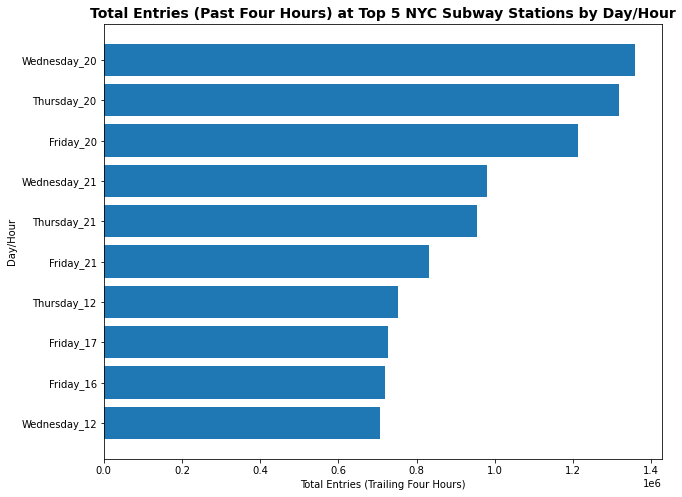

In [592]:
plt.figure(figsize=[10,8])
plt.barh(df_MTA_2019_top5_day_hour_total.DAY_HR, df_MTA_2019_top5_day_hour_total.ENTRIES_TIME_PERIOD)
plt.gca().invert_yaxis()
plt.title("Total Entries (Past Four Hours) at Top 5 NYC Subway Stations by Day/Hour", weight='bold', fontsize = 14)
plt.xlabel("Total Entries (Trailing Four Hours)")
plt.ylabel("Day/Hour");